# **Purwadhika Final Project**

## From Clusters to Campaigns
## Delta Team
Joshua Tanujaya<br>
Amanda Sibuea

## 1. Business Knowledge & Context
- The dataset represent credit card usage behaviour of customers from a financial institution.<br>
- Each row represents a customer and their account with features that include transaction patterns, payment habits, and balance-related behaviour.<br>
- These behaviours can reveal important insights about spending habits, credit risk, and customer value.<br>
- All of which are crucial in financial services.<br>
- Amongst the diverse customers, the financial insitution would like to segment them to find out which are profitable and high-value customer as well as which ones are risky in order to take necessary actions.

### 1.1. Problem Statement
- The financial insitution lacks data-driven understanding of customer behaviours and spending patterns.<br>
- There may be underappreciated high value customers that can be rewarded to retain them and unnoticed risky or economically challenged customers that need attention.<br>
- Without segmentation, marketing efforts are generalised which will lead to suboptimal campaign performances.<br>
- Thus leading to lower engagement and missed revenue opportunities.<br>
- The challenge is to transform the raw transactional data and behavioural data into meaningful segments that reflect customer preferences, risk levels, and usage dynamics.

### 1.2. Goal
- To segment the credit card customers into distinct behavioural groups using clustering, and dimensionality reduction techniques.<br>
- In order to enable targeted marketing strategies, personalised offers, and improved customer retention.<br>
- Therefore, customer behaviours comprehension can be achieved as well as criterias for each cluster.

### 1.3. Evaluation Metrics

- Since this is an unlabeled dataset, this project uses unsupervised clustering and the results are evaluated with the silhouette score, which measures how well each point fits within its cluster compared to others (ranging from -1 to 1).<br>
- A higher score indicates better-defined clusters.<br>
- However, the silhouette score alone may not fully capture cluster distinctiveness, with that the PCA plots are also used to visually assess separation and choose the best clustering result.

## Import Libraries

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### 1.4. Dataset Feature Understanding

- Un-labeled dataset
- Unsupervised learning required (clustering)
- ALL features are numerical
- Each data row represents a credit-card user/cutomer

### Attribute Information

| Column Name                      | Data Type     | Explanation                                                                                       |
|----------------------------------|---------------|---------------------------------------------------------------------------------------------------|
| CUST_ID                          | Unique Value  | Identification of Credit Card holder                                                              |
| BALANCE                          | Numerical     | Balance amount left in their account to make purchases                                            |
| BALANCE_FREQUENCY                | Numerical     | How frequently the Balance is updated (0 = not frequently, 1 = frequently updated)                |
| PURCHASES                        | Numerical     | Amount of purchases made from account                                                             |
| ONEOFF_PURCHASES                 | Numerical     | Maximum purchase amount done in one-go                                                            |
| INSTALLMENTS_PURCHASES          | Numerical     | Amount of purchase done in installment                                                            |
| CASH_ADVANCE                     | Numerical     | Cash in advance given by the user                                                                 |
| PURCHASES_FREQUENCY              | Numerical     | Frequency of purchases (0 = not frequently purchased, 1 = frequently purchased)                   |
| ONEOFFPURCHASESFREQUENCY        | Numerical     | Frequency of one-go purchases (0 = not frequently, 1 = frequently)                                |
| PURCHASESINSTALLMENTSFREQUENCY  | Numerical     | Frequency of installment purchases (0 = not frequently, 1 = frequently)                           |
| CASHADVANCEFREQUENCY            | Numerical     | Frequency of cash advances being paid                                                             |
| CASHADVANCETRX                  | Numerical     | Number of transactions made with "Cash in Advance"                                                |
| PURCHASES_TRX                   | Numerical     | Number of purchase transactions made                                                              |
| CREDIT_LIMIT                    | Numerical     | Limit of Credit Card for user                                                                     |
| PAYMENTS                        | Numerical     | Amount of payment done by user                                                                    |
| MINIMUM_PAYMENTS                | Numerical     | Minimum amount of payments made by user                                                           |
| PRCFULLPAYMENT                  | Numerical     | Percent of full payment paid by user                                                              |
| TENURE                          | Numerical     | Tenure of credit card service for user                                                            |

## 2. Initial Data Understanding

In [106]:
# Read initial dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [108]:
df.describe(include="all")

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

In [109]:
df.duplicated().sum()
# There are no duplicated values in this dataset

0

In [110]:
df.isna().sum()
# There are some missing values in this dataset

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [111]:
df["CUST_ID"].nunique()
# This confirms that all customer ids are unique and there is no duplicated customer ids.

8950

**Analysis**<br>
- In this credit card dataset, there is a total of 18 columns and 8950 rows.<br>
- Out fo the 18 columns, 1 is the feature that states the customer id: `CUST_ID`.<br>
- This is the only categorical feature that identifies the credit card holder.<br>
- Since the goal of this project is to cluster in order to segment the users, the customer id feature is not included in the features used to cluster.<br>
- With that, it will be dropped to keep the dataset clean.<br><br>
- The other 17 columns describes the user behaviour in regard to their credit card usage.<br>
- These includes not only their purchases and cash advances, but also their credit card payments, credit limits, and tenure, amongst others.<br><br>
- After a quick look at the dataset, it is confirmed that there are no data duplicates that will make the segmentation biased.<br>
- However, there is a total of 314 rows with missing values.<br>
- 313 of these missing values come from the `MINIMUM_PAYMENTS` column while 1 other comes from the `CREDIT_LIMIT` column.<br>
- Further understanding of these missing values and solution to it, can be seen below.

## 3. Further Data Understanding & Data Cleaning

In [112]:
# Drop CUST_ID column
df.drop("CUST_ID", axis=1, inplace=True)

### 3.1. Missing Values in MINIMUM_PAYMENTS

- To understand the missing values in the `MINIMUM_PAYMENTS` column, we need to understand what the feature describes and it's relevance to other features.<br>
- From the definition given by the dataset, `MINIMUM_PAYMENTS` is the minimum amount of payments made by the user.<br>
- While the column `PAYMENTS` is all about the actual amount of payment done by the user.<br>
- With that, the relationship between null values of `MINIMUM_PAYMENTS` and `PAYMENTS` is explored further.

In [113]:
df[df["MINIMUM_PAYMENTS"].isnull()][["PAYMENTS", "MINIMUM_PAYMENTS"]].head()
# Not all rows where the value for PAYMENTS is 0 means that the MINIMUM_PAYMENTS is null

PAYMENTS  MINIMUM_PAYMENTS
3     0.000000               NaN
45    0.000000               NaN
47    0.000000               NaN
54  417.016763               NaN
55    0.000000               NaN

In [114]:
df["MINIMUM_PAYMENTS"].isnull().sum()
# There is a total of 313 missing values in the MINIMUM_PAYMENTS column

313

In [115]:
df[df["PAYMENTS"] == 0].shape[0]
# The number of rows where payments is 0 is 240 rows

240

In [116]:
df[(df["MINIMUM_PAYMENTS"].isnull()) & (df["PAYMENTS"] == 0)].shape[0]
# The number of null values in MINIMUM_PAYMENTS where PAYMENTS is 0 is 240
# Which means that in all cases where PAYMENTS is 0, MINIMUM_PAYMENTS is always missing
# This makes sense logically as if there are no payments made by the user, there will be no minimum payments that is recorded

240

In [117]:
df[(df["MINIMUM_PAYMENTS"].isnull()) & (df["PAYMENTS"] != 0)].shape[0]
# The number of null values in MINIMUM_PAYMENTS where PAYMENTS does not equal to 0 is 73
# Which adds up to 313 of null values in MINIMUM_PAYMENTS

73

In [118]:
# Where PAYMENTS == 0, it is logical to have MINIMUM_PAYMENTS to also be 0
condition = (df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna())

# Where this condition is met, impute MINIMUM_PAYMENTS = 0
df.loc[condition, 'MINIMUM_PAYMENTS'] = 0

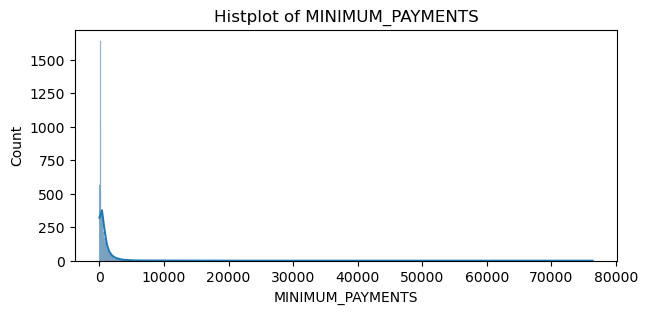

In [119]:
# Check distribution of MINIMUM_PAYMENTS
plt.figure(figsize=(7,3))
sns.histplot(x=df["MINIMUM_PAYMENTS"], kde=True)
plt.title(f"Histplot of MINIMUM_PAYMENTS")
plt.show()

# MINIMUM_PAYMENTS is not normally distributed

In [120]:
# Statistical test to test normality of the distribution of MINIMUM_PAYMENTS
# Shapiro wilk test on the distribution of MINIMUM_PAYMENTS after dropping missing values because shapiro wilk test cannot handle missing values
subset = df["MINIMUM_PAYMENTS"].dropna()
stat, p = shapiro(subset)
print(f"Shapiro-Wilk Test: p-value = {p}")

# The p-value is less than 0.05, there is enough evidence to reject the null hypothesis.
# We can conclude that the data does not follow a normal distribution.
# Therefore, it is justified to impute the rest of the missing values with the median of the feature.

Shapiro-Wilk Test: p-value = 5.356374897311816e-104


c:\Users\amfed\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8877.
  res = hypotest_fun_out(*samples, **kwds)


In [121]:
# Imputing the rest of missing values of MINIMUM_PAYMENTS with the median
# Calculate the median
median_value = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_value, inplace=True)


C:\Users\amfed\AppData\Local\Temp\ipykernel_26108\2955706297.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(median_value, inplace=True)


- To summarise the handling of missing values for `MINIMUM_PAYMENTS`, it can be seen that from the 313 rows of missing values, 240 of those rows is due to the fact that in those rows, the value for `PAYMENTS` is equal to 0.<br>
- With that, it is logical to impute 0 into the `MINIMUM_PAYMENTS`.<br>
- This is because there is no minimum payments made by the user if they have made no payments at all.<br>
- For the rest of the 73 rows of `MINIMUM_PAYMENTS` missing values, where the PAYMENTS rows is not 0, the median of `MINIMUM_VALUES` is simply imputed.<br>
- This is because `MINIMUM_PAYMENTS` is not normally distributed.<br>
- This can be seen from the histogram of `MINIMUM_PAYMENTS` as well as the Shapiro-Wilk normality test above.<br>
- Median is also chosen to keep the distribution of `MINIMUM_PAYMENTS` constant.

### 3.2. Missing Values in CREDIT_LIMIT

Below is the data understanding on why one `CREDIT_LIMIT` row has a missing value.

In [122]:
df["CREDIT_LIMIT"].isna().sum()

1

In [123]:
df[df["CREDIT_LIMIT"].isna()]
# Nothing about this row or user is specifically interesting.

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [124]:
# Use KNN imputer to handle the singular missing value
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

- KNN uses the similarity between data points to estimate the missing value.<br>
- In the case of this singular missing value, it can produce a more accurate and context-aware estimate.<br>
- Compared to mean or median imputation, KNN tends to preserve relationships between features.

In [125]:
df.isna().sum()
# There are no more missing values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 3.3. Mismatch Values for PURCHASES

- Further exploration shows that there is a mismatch value for `PURCHASES` in regards to its relationship with the `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES` features.<br>
- From the definition, PURCHASES should be equal to `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES` added together.<br>

In [126]:
purchases_mismatch_mask = ~np.isclose(df["PURCHASES"], df["ONEOFF_PURCHASES"] + df["INSTALLMENTS_PURCHASES"])   # np.isclose is used because of the float values
mismatched_rows = df[purchases_mismatch_mask]

In [127]:
mismatched_rows.shape[0]
# There is only a total of 19 rows where the values does not match

19

In [128]:
mismatched_rows.head()
# Nothing about the mismatch rows is interesting to be a reason why PURCHASES is not equal to the combination of ONEOFF and INSTALLMENTS

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
510     32.042424           0.909091     400.41              0.00   
745   1544.979869           1.000000     880.19              0.00   
908    939.152528           1.000000    3393.25           3364.59   
1458     4.382924           0.272727     130.24              0.00   
3987  2552.597938           1.000000     550.62              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
510                   489.39           0.0             0.833333   
745                   927.45           0.0             1.000000   
908                    77.66           0.0             0.250000   
1458                  152.24           0.0             0.083333   
3987                  583.95           0.0             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
510                         0.00                          0.750000   
745                         0.00                          1.000000   
908                         0.25                          0.083333   
1458                        0.00                          0.083333   
3987                        0.00                          0.916667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
510                      0.0               0.0           11.0        4500.0   
745                      0.0               0.0           46.0        1500.0   
908                      0.0               0.0            5.0        9000.0   
1458                     0.0               0.0            0.0       14000.0   
3987                     0.0               0.0           24.0        3000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
510     353.570259        132.131820          0.666667    12.0  
745    1189.503063       1104.152962          0.000000    12.0  
908    2768.821579        267.093439          0.000000    12.0  
1458  28988.973880       1092.184812          0.500000    12.0  
3987    478.632499       1080.350480          0.000000    12.0

In [129]:
mismatched_rows = mismatched_rows.copy()
mismatched_rows["SUM"] = mismatched_rows["ONEOFF_PURCHASES"] + mismatched_rows["INSTALLMENTS_PURCHASES"]
mismatched_rows["DIFF"] = mismatched_rows["SUM"] - mismatched_rows["PURCHASES"]
mismatched_rows[["PURCHASES", "SUM", "DIFF"]]
# Looks like whenever the PURCHASES values does not match the sum off ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES, it is always lower than the sum
# This is most likely due to the system updating error.

PURCHASES      SUM    DIFF
510      400.41   489.39   88.98
745      880.19   927.45   47.26
908     3393.25  3442.25   49.00
1458     130.24   152.24   22.00
3987     550.62   583.95   33.33
4682       0.00    20.00   20.00
5231     205.06   607.76  402.70
5356      47.69    82.41   34.72
5737       0.00    66.95   66.95
5845      65.60   112.60   47.00
5846     486.27   580.20   93.93
5967     279.76   578.55  298.79
6535     468.96   498.96   30.00
6711     465.50   513.00   47.50
6790     426.25   653.55  227.30
6803     339.11   624.06  284.95
6857    5629.41  6229.41  600.00
8183     356.77   378.99   22.22
8834     510.00   780.00  270.00

In [130]:
# Simply overwrite mismatched PURCHASES values with the corrected sum
df.loc[purchases_mismatch_mask, "PURCHASES"] = (
    df.loc[purchases_mismatch_mask, "ONEOFF_PURCHASES"] + df.loc[purchases_mismatch_mask, "INSTALLMENTS_PURCHASES"]
)
# This is because the main reason of this mismatch is simply because of an input error (19 rows is a small number)

- 19 rows is a small number of rows where the values does not match.<br>
- This can simply be considered as an input or system updating error.<br>
- Especially because whenever there is a mismatch of values, the PURCHASES value is always lower than the sum of `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`

## 4. Exploratory Data Analysis

- In this section, the analysis starts with looking deep into the features that has correlations.
- However, some analysis also discusses features that may not have correlations but has logical relationship with each other.
- Such as the `PURCHASES` and `CASH_ADVANCE` features as they are not correlated at all in terms of value but they do have a relationship in regards to the user's purpose in having a credit card

### 4.1. Overall Correlation

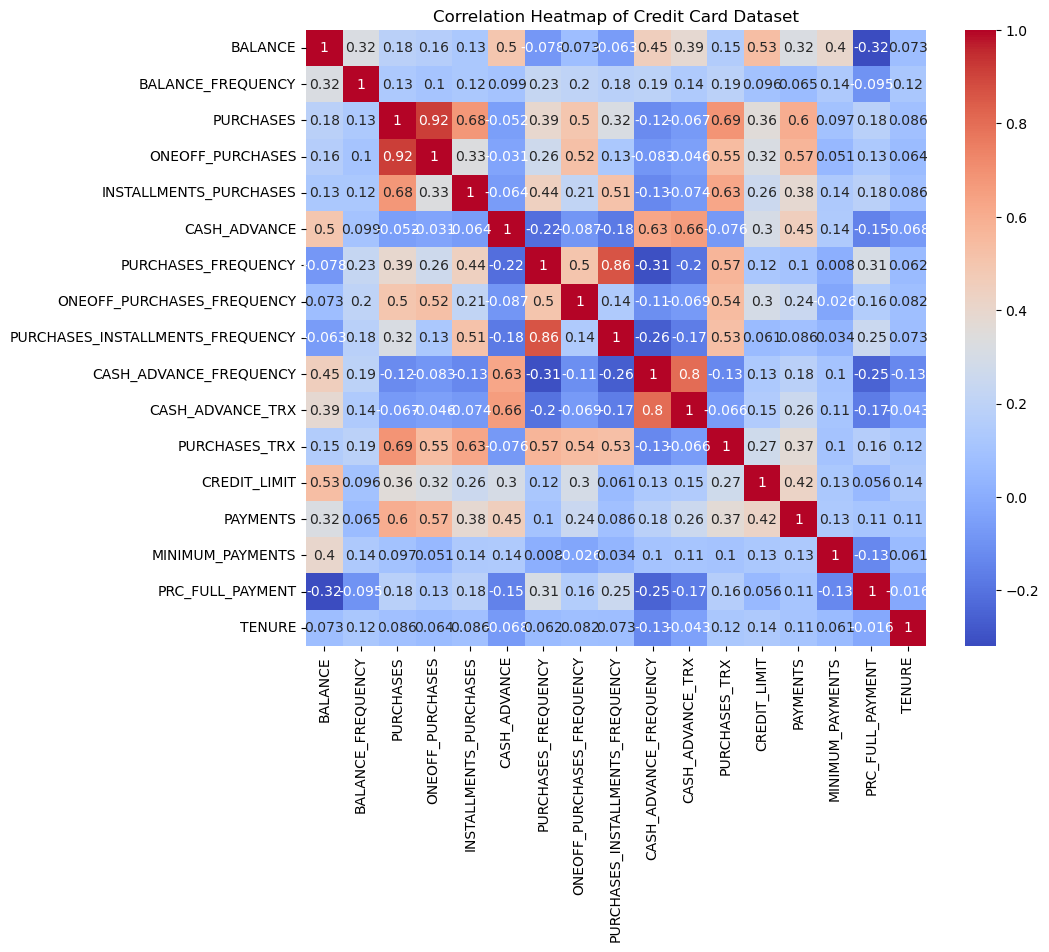

In [131]:
# Correlation between all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title(f"Correlation Heatmap of Credit Card Dataset")
plt.show()

**Analysis**<br>
- From the heatmap above, it can be seen that there is a few features with high correlation with each other.<br>
- The biggest correlation with a coefficient of 0.92 is between `PURCHASES` and `ONEOFF_PURCHASES`.<br>
- It is also notable to mention that the coefficient between `PURCHASES` and `INSTALLMENTS_PURCHASES` is also on the higher side at 0.68.<br>
- This is because `ONEOFF_PURCHASES` added with `INSTALLMENTS_PURCHASES` is equal to `PURCHASES`.<br><br>
- Another notable correlation is between the `PURCHASES_FREQUENCY` feature and the `PURCHASES_INSTALLMENTS_FREQUENCY` feature with a coefficient of 0.86.<br>
- This is because similar to `PURCHASES`, `PURCHASES_FREQUENCY` is the combination of `ONEOFF_PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`.<br>
- It can also be seen on the heatmap that the coefficient correlation between `PURCHASES_FREQUENCY` and `ONEOFF_PURCHASES_FREQUENCY` is at 0.5 which is not high but also not insignificant.<br><br>
- Both `CASH_ADVANCE_TRX` and `PURCHASES_TRX` has a pretty strong positive correlation with its respective frequency features.<br>
- This is because TRX explains the number of transactions.

### 4.2. BALANCE and BALANCE_FREQUENCY

- Pairing these features reveals whether higher balances are held consistently or sporadically
- This can help identify active and passive customers segmentations within high balance or low balance customers
- It is expected that higher balance customers has higher balance frequency as customers who frequently uses their credit card need a high balance in their account

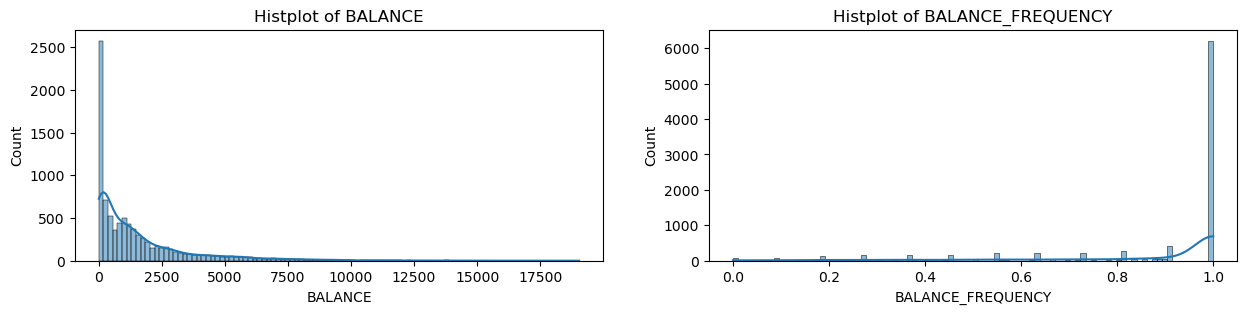

In [132]:
# BALANCE and BALANCE_FREQUENCY histograms
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(x=df["BALANCE"], kde=True)
plt.title(f"Histplot of BALANCE")

plt.subplot(1,2,2)
sns.histplot(x=df["BALANCE_FREQUENCY"], kde=True)
plt.title(f"Histplot of BALANCE_FREQUENCY")
plt.show()

**Analysis**<br>
- `BALANCE` variable shows a right-skewed distribution indicating that a majority of the credit card users maintain low remaining credit, with only a small subset carrying high balances.<br>
- As `BALANCE` is the leftover amount the user can make reltive to their credit limit, in general the users are maxing out their credit card.<br>
- Additionally, `BALANCE_FREQUENCY` is left skewed.<br>
- This suggests that most users have high frequency of balance updates since nearly all values cluster close to 1.<br>
- This implies that the financial institution's customers or users are consistently active.<br><br>
Low `BALANCE` but High `BALANCE_FREQUENCY` might reflect:
- Frequent usage with minimal remaining credit
- Potential signs of heavy utilisation
- May indicate revolving spenders or users operating near their credit ceiling

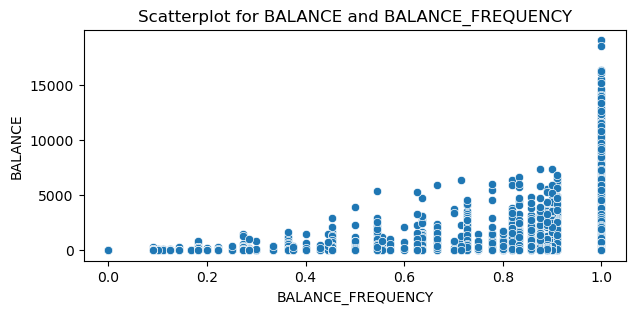

In [133]:
# Scatterplot
plt.figure(figsize=(7,3))
sns.scatterplot(x="BALANCE_FREQUENCY", y="BALANCE", data=df)
plt.title(f"Scatterplot for BALANCE and BALANCE_FREQUENCY")
plt.show()

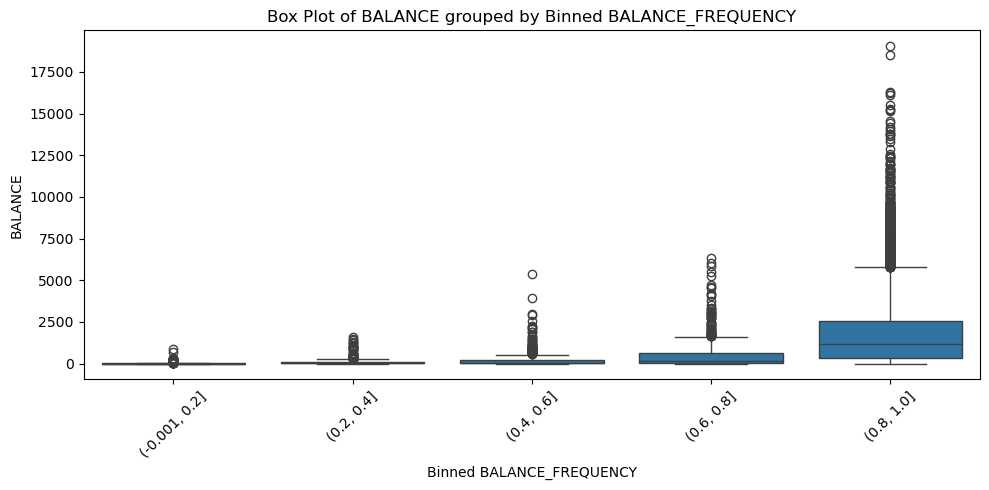

In [134]:
df['BF_BIN'] = pd.cut(df['BALANCE_FREQUENCY'], bins=5)
plt.figure(figsize=(10, 5))
sns.boxplot(x='BF_BIN', y='BALANCE', data=df)
plt.title("Box Plot of BALANCE grouped by Binned BALANCE_FREQUENCY")
plt.xlabel("Binned BALANCE_FREQUENCY")
plt.ylabel("BALANCE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this stacked boxplot visualizations, it can be seen that : 
- customers with lower `BALANCE_FREQUENCY` have less spread of `BALANCE`
- the higher the `BALANCE_FREQUENCY`, the higher the median of the group

**Analysis**<br>
The clusters near `BALANCE_FREQUENCY` = 1 & Low `BALANCE`:
- users frequently update their balances and have very little available credit left.
- they are highly active and likely close to their credit limits.
- could signal high utilisation or constant engagement - potential risk

Users with high `BALANCE` & high `BALANCE_FREQUENCY`:
- users frequently check and update but maintain large unused credit
- could imply strategic usage, small transactions, or conservative financial habits - low profile.
The weak positive correlation on 0.32 suggests that users who update balances more often tend to slightly maintain more availale credit but the relationship isn't strong.<br>

With that, activity alone doesn't explain credit availability.

In [135]:
# High Balance users
high_balance_users = df[df["BALANCE"] >= 10000]
high_balance_users["BALANCE_FREQUENCY"].value_counts()

BALANCE_FREQUENCY
1.0    66
Name: count, dtype: int64

**Analysis**<br>
- This group of high balance users have significantly unused credit capacity.<br>
- They maintain that available credit in frequently updater or monitored fashion.<br>
- This can mean strategic users, low risk & high value users, and financially empowered behaviour

### 4.3. PURCHASES

- Helps understanding how customers behaviour in spending (big spend at one - oneoff, overtime - installments, or a mix of both)
- One off purchases would be done by impulsive customers that likes single-payments
- Installment purchases are preferred more by financially-cautious customers or credit-dependent
- It is expected that more customers will be tilted to one side (oneoff or installments) rather than doing both

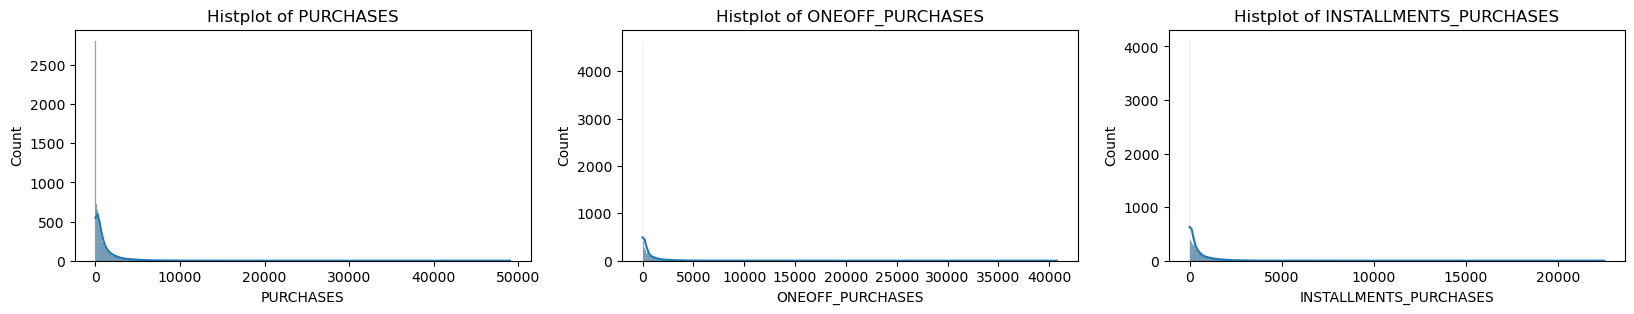

In [136]:
# Histograms for PURCHASES, ONEOFF_PURCHAES and INSTALLMENTS_PURCHASES
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.histplot(x=df["PURCHASES"], kde=True)
plt.title(f"Histplot of PURCHASES")

plt.subplot(1,3,2)
sns.histplot(x=df["ONEOFF_PURCHASES"], kde=True)
plt.title(f"Histplot of ONEOFF_PURCHASES")

plt.subplot(1,3,3)
sns.histplot(x=df["INSTALLMENTS_PURCHASES"], kde=True)
plt.title(f"Histplot of INSTALLMENTS_PURCHASES")
plt.show()

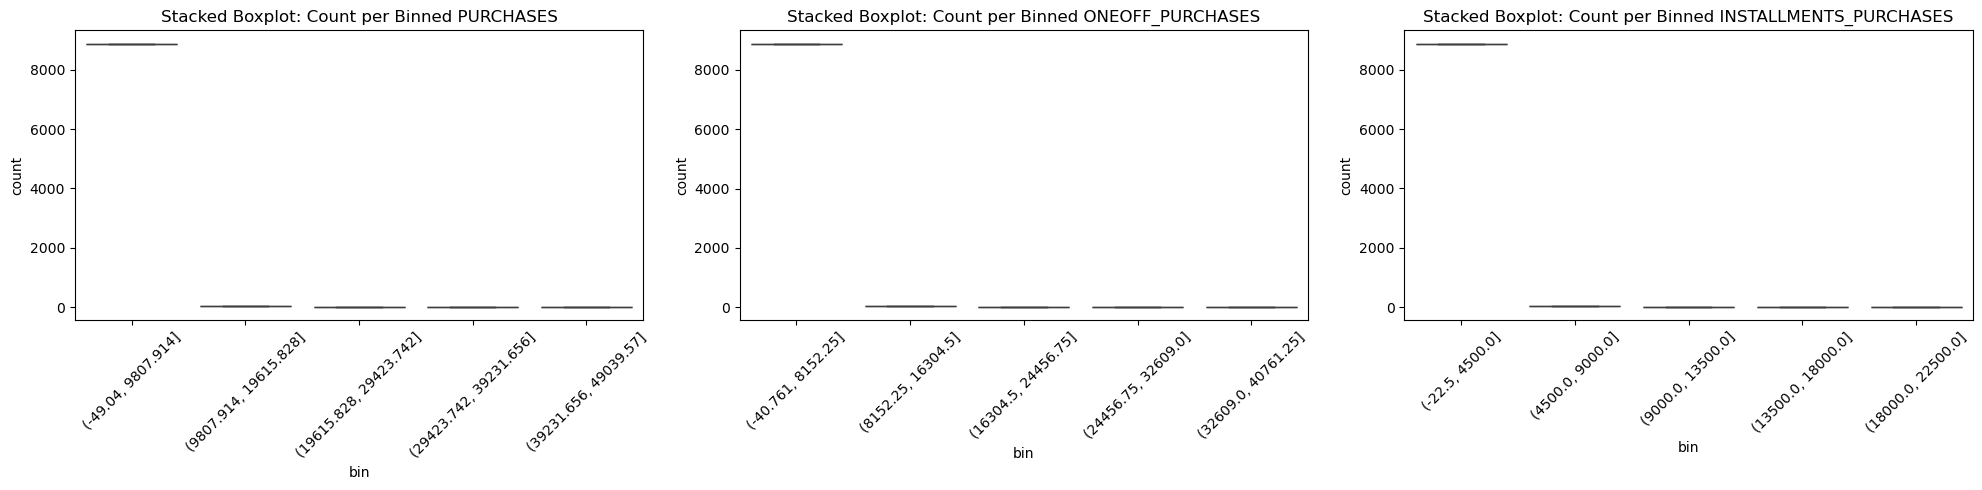

In [137]:
# Create binned x-variables
df['PURCHASES_BIN'] = pd.cut(df['PURCHASES'], bins=5)
df['ONEOFF_PURCHASES_BIN'] = pd.cut(df['ONEOFF_PURCHASES'], bins=5)
df['INSTALLMENTS_PURCHASES_BIN'] = pd.cut(df['INSTALLMENTS_PURCHASES'], bins=5)

# Count how many rows fall into each bin
purchases_counts = df['PURCHASES_BIN'].value_counts().sort_index().reset_index()
purchases_counts.columns = ['bin', 'count']

oneoff_counts = df['ONEOFF_PURCHASES_BIN'].value_counts().sort_index().reset_index()
oneoff_counts.columns = ['bin', 'count']

installments_counts = df['INSTALLMENTS_PURCHASES_BIN'].value_counts().sort_index().reset_index()
installments_counts.columns = ['bin', 'count']

# Plot stacked box plots with count as y-axis
plt.figure(figsize=(20, 5))

# Plot 1: PURCHASES
plt.subplot(1, 3, 1)
sns.boxplot(x='bin', y='count', data=purchases_counts)
plt.title("Stacked Boxplot: Count per Binned PURCHASES")
plt.xticks(rotation=45)

# Plot 2: ONEOFF_PURCHASES
plt.subplot(1, 3, 2)
sns.boxplot(x='bin', y='count', data=oneoff_counts)
plt.title("Stacked Boxplot: Count per Binned ONEOFF_PURCHASES")
plt.xticks(rotation=45)

# Plot 3: INSTALLMENTS_PURCHASES
plt.subplot(1, 3, 3)
sns.boxplot(x='bin', y='count', data=installments_counts)
plt.title("Stacked Boxplot: Count per Binned INSTALLMENTS_PURCHASES")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**Analysis**<br>
- All three shows right-skewedness.<br>
- For `PURCHASES` this means that most users make relatively low purchase amount, with fewer engaging in high-volume spending.<br>
- For `ONEOFF_PURCHASES`, it shows that occasional large purchases are rare and most users tend toward smaller one time transactions.<br>
- For `INSTALLMENTS_PURCHASES`, it shows that most users either avoid installments or user them for lower sums.<br>
- The biggest takeaway from this is that most of the customers are low spenders.<br>
- They favour one time purchases rather than regular installments-based purchasing.<br>

In [138]:
# ONEOFF and INSTALLMENTS Ratio towards PURCHASES
df["ONEOFF_RATIO"] = df["ONEOFF_PURCHASES"] / df["PURCHASES"].replace(0, np.nan)
df["INSTALLMENT_RATIO"] = df["INSTALLMENTS_PURCHASES"] / df["PURCHASES"].replace(0, np.nan)

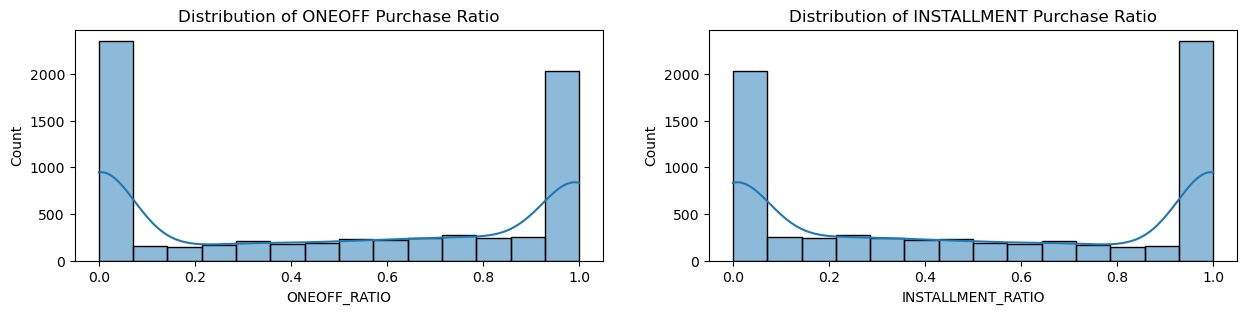

In [139]:
# Ratio Histogram
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(x = df["ONEOFF_RATIO"], kde=True)
plt.title("Distribution of ONEOFF Purchase Ratio")

plt.subplot(1,2,2)
sns.histplot(df["INSTALLMENT_RATIO"], kde=True)
plt.title("Distribution of INSTALLMENT Purchase Ratio")
plt.show()

In [140]:
# Define purchase style
def classify_style(row):
    if row["ONEOFF_RATIO"] > 0.8:
        return "Oneoff Dominant"
    elif row["INSTALLMENT_RATIO"] > 0.8:
        return "Installments Dominant"
    else:
        return "Balanced"

df["PURCHASE_STYLE"] = df.apply(classify_style, axis=1)
df["PURCHASE_STYLE"].value_counts()

PURCHASE_STYLE
Balanced                 3834
Installments Dominant    2628
Oneoff Dominant          2488
Name: count, dtype: int64

**Analysis**<br>
For the `ONEOFF_RATIO` there are two peaks:
- peak at 0 shows users who make no one-off purchases at all
- peak at 1 shows users who only make one-off purchases
This indicates polarisation where users either fully avoid one-off spending or exclusively rely on it.<br><br>

For the `INSTALLMENTS_RATIO` there are two peaks:
- peak at 0 shows users who make no installments
- peak at 1 shows users who only make installments
This shows a strong divide between spending types.<br><br>

There seems to be 3 distinct behavioural clusters:
- one-off dominants: impulsive or flexibel spenders
- installments dominants: structured, budget conscious buyers
- mixed behaviour group: blended spenders who balance between the two<br><br>

The `PURCHASE_STYLE` is also divided pretty equally

In [141]:
# For inspection purposes only
balanced_group = df[df["PURCHASE_STYLE"] == "Balanced"]

zero_spenders = balanced_group[balanced_group["PURCHASES"] == 0]
true_balanced = balanced_group[balanced_group["PURCHASES"] > 0]

print("Zero-spending users:", len(zero_spenders))
print("True balanced purchasers:", len(true_balanced))

Zero-spending users: 2042
True balanced purchasers: 1792


In [142]:
zero_spenders["CASH_ADVANCE"].nunique()

2042

**Analysis**<br>
- After looking further into the balanced purchase style, it can be seen that there are 2042 zero spending users and 1792 true balanced purchasers.<br>
- Though, looking into the other user behaviour of `CASH_ADVANCE` within the zero spenders, it shows that there are no truly dormant users.<br>
- Every single one has engaged with their credit card account in some way.<br>

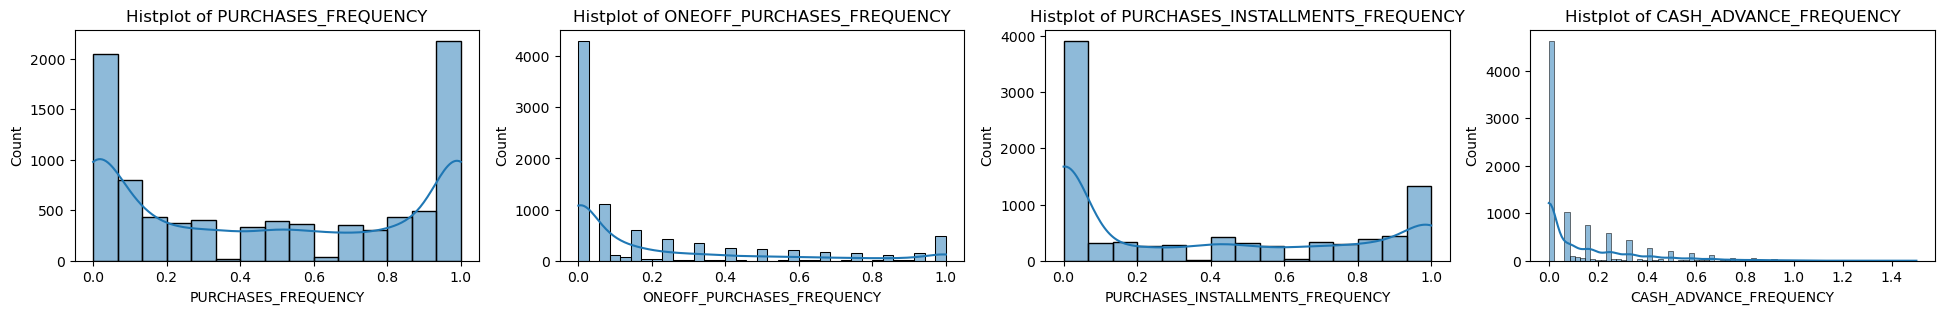

In [143]:
# Histograms for PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCE_FREQUENCY
plt.figure(figsize=(24,3))

plt.subplot(1,4,1)
sns.histplot(x=df["PURCHASES_FREQUENCY"], kde=True)
plt.title(f"Histplot of PURCHASES_FREQUENCY")

plt.subplot(1,4,2)
sns.histplot(x=df["ONEOFF_PURCHASES_FREQUENCY"], kde=True)
plt.title(f"Histplot of ONEOFF_PURCHASES_FREQUENCY")

plt.subplot(1,4,3)
sns.histplot(x=df["PURCHASES_INSTALLMENTS_FREQUENCY"], kde=True)
plt.title(f"Histplot of PURCHASES_INSTALLMENTS_FREQUENCY")

plt.subplot(1,4,4)
sns.histplot(x=df["CASH_ADVANCE_FREQUENCY"], kde=True)
plt.title(f"Histplot of CASH_ADVANCE_FREQUENCY")
plt.show()

**Analysis**<br>
For `PURCHASES_FREQUENCY`:
- There is a bimodal distribution with peaks at both low and high ends
- It suggests two dominant user types:
    1. Infrequent spenders (low frequency): possible passive accounts
    2. Frequent spenders (high frequency): more likely to be habitual credit card users
- Clear behavioural acis with regular vs occasional engagement.

For `ONEOFF_PURCHASES_FREQUENCY`:
- there is a strong right skew which means that the majority of the users do very few oneoff purchases
- these might be impulse buyers but in low volumes
- this reinforces the earlier assumption that users dont lean havily on oneoff transactions even when they do spend.

For `PURCAHSES_INSTALLMENTS_FREQUENCY`:
- there is a strong skew towards zero so that means very few users use credit card for installment based purchases
- even among active spenders, installment behaviour is rare
- this could imply lack of trust in structured credit or preference for immediacy

For `CASH_ADANCVE_FREQUENCY`:
- has a very steep right skew
- cash advances does not occur frequently but presense alone confirms some cash reliant activity even if it is in low frequency.
- paired with low installment usage, this could lead to liquidity seekers using credit for short term needs not strategic planning.

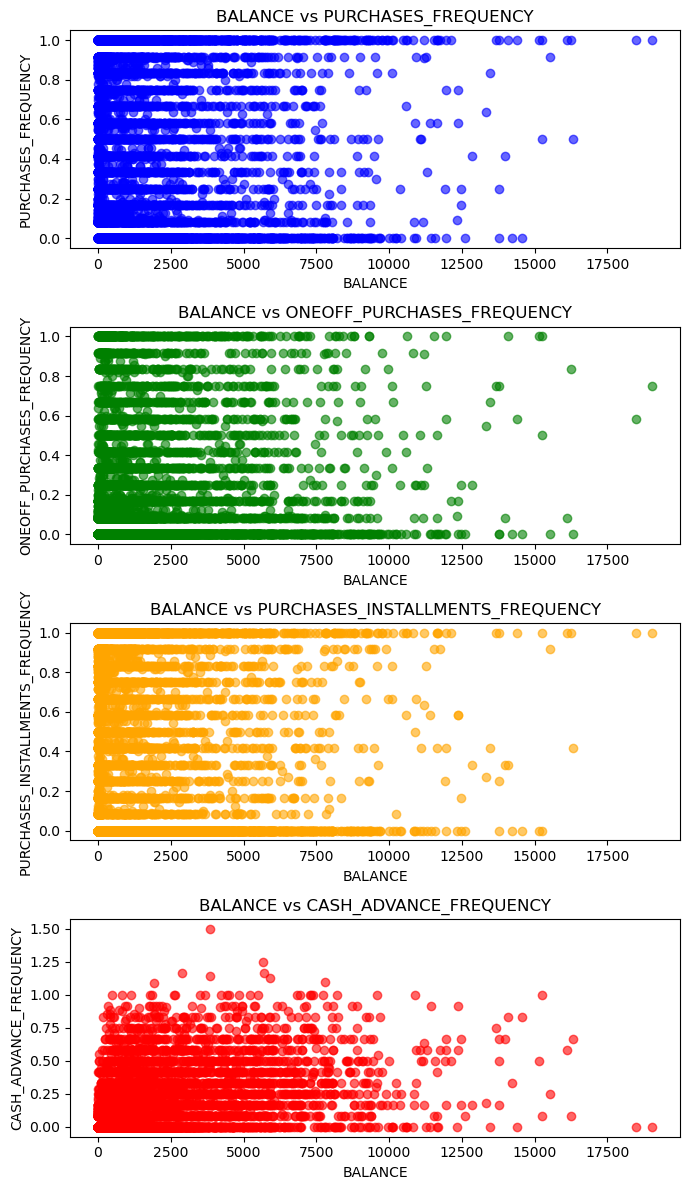

In [144]:
fig, axs = plt.subplots(4, 1, figsize=(7, 12))  # 4 rows, 1 column

# Plot 1
axs[0].scatter(df['BALANCE'], df['PURCHASES_FREQUENCY'], alpha=0.6, color='blue')
axs[0].set_title('BALANCE vs PURCHASES_FREQUENCY')
axs[0].set_xlabel('BALANCE')
axs[0].set_ylabel('PURCHASES_FREQUENCY')

# Plot 2
axs[1].scatter(df['BALANCE'], df['ONEOFF_PURCHASES_FREQUENCY'], alpha=0.6, color='green')
axs[1].set_title('BALANCE vs ONEOFF_PURCHASES_FREQUENCY')
axs[1].set_xlabel('BALANCE')
axs[1].set_ylabel('ONEOFF_PURCHASES_FREQUENCY')

# Plot 3
axs[2].scatter(df['BALANCE'], df['PURCHASES_INSTALLMENTS_FREQUENCY'], alpha=0.6, color='orange')
axs[2].set_title('BALANCE vs PURCHASES_INSTALLMENTS_FREQUENCY')
axs[2].set_xlabel('BALANCE')
axs[2].set_ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')

# Plot 4
axs[3].scatter(df['BALANCE'], df['CASH_ADVANCE_FREQUENCY'], alpha=0.6, color='red')
axs[3].set_title('BALANCE vs CASH_ADVANCE_FREQUENCY')
axs[3].set_xlabel('BALANCE')
axs[3].set_ylabel('CASH_ADVANCE_FREQUENCY')

# Adjust layout
plt.tight_layout()
plt.show()

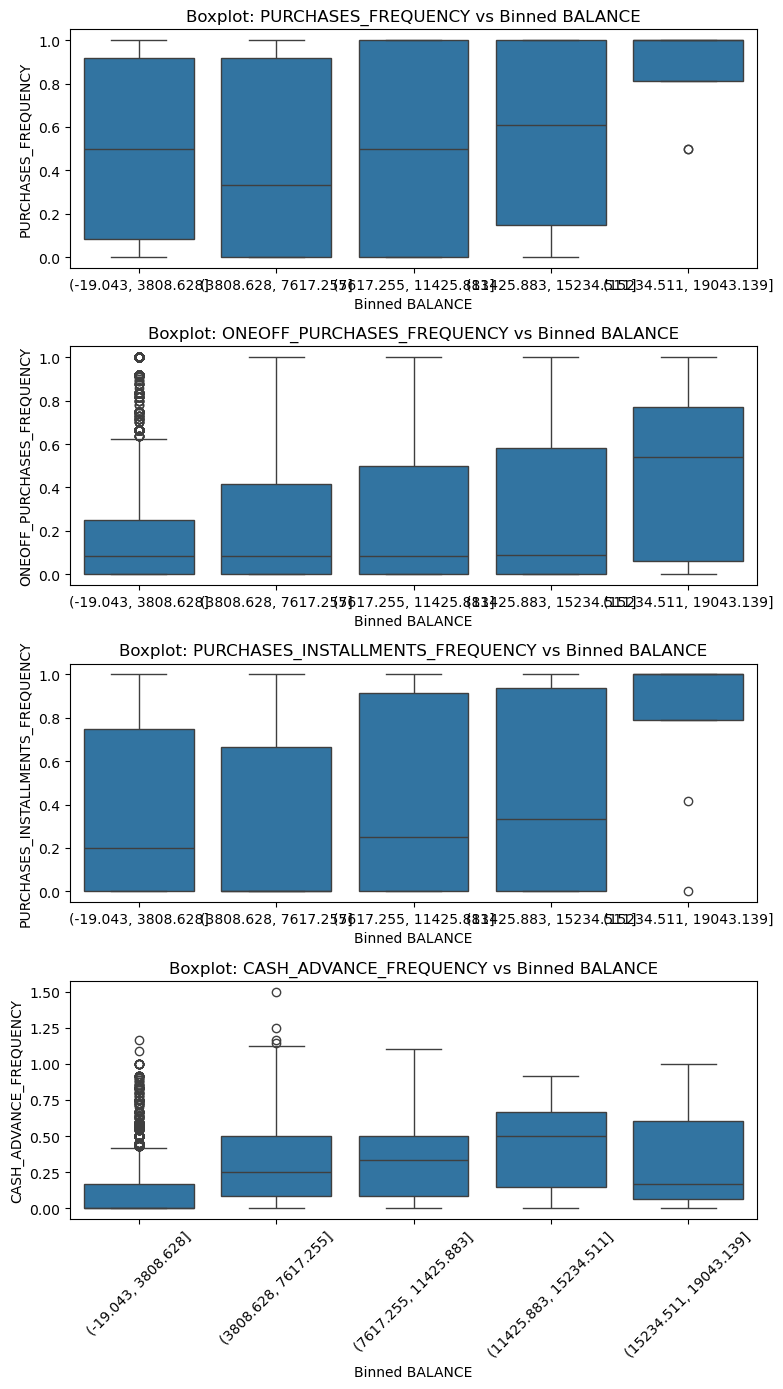

In [145]:
# Bin the x-variable (BALANCE)
df['BALANCE_BIN'] = pd.cut(df['BALANCE'], bins=5)

fig, axs = plt.subplots(4, 1, figsize=(8, 14))  # 4 rows, 1 column

# Plot 1
sns.boxplot(x='BALANCE_BIN', y='PURCHASES_FREQUENCY', data=df, ax=axs[0])
axs[0].set_title('Boxplot: PURCHASES_FREQUENCY vs Binned BALANCE')
axs[0].set_xlabel('Binned BALANCE')
axs[0].set_ylabel('PURCHASES_FREQUENCY')
plt.xticks(rotation=45)

# Plot 2
sns.boxplot(x='BALANCE_BIN', y='ONEOFF_PURCHASES_FREQUENCY', data=df, ax=axs[1])
axs[1].set_title('Boxplot: ONEOFF_PURCHASES_FREQUENCY vs Binned BALANCE')
axs[1].set_xlabel('Binned BALANCE')
axs[1].set_ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.xticks(rotation=45)

# Plot 3
sns.boxplot(x='BALANCE_BIN', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df, ax=axs[2])
axs[2].set_title('Boxplot: PURCHASES_INSTALLMENTS_FREQUENCY vs Binned BALANCE')
axs[2].set_xlabel('Binned BALANCE')
axs[2].set_ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xticks(rotation=45)

# Plot 4
sns.boxplot(x='BALANCE_BIN', y='CASH_ADVANCE_FREQUENCY', data=df, ax=axs[3])
axs[3].set_title('Boxplot: CASH_ADVANCE_FREQUENCY vs Binned BALANCE')
axs[3].set_xlabel('Binned BALANCE')
axs[3].set_ylabel('CASH_ADVANCE_FREQUENCY')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Lower `BALANCE` customer also have more frequency in purchases, oneoff purchases, installments purchases, even cash advance.
- From the stacked boxplot, it can be seen that:
    - `PURCHASES_FREQUENCY` vs `BALANCE`
        - each group has a significant spread except the highest one, which means customers have more variations around the middle-low group
        - the highest group has the highest median, which means that customers with high balance are the most active cusstomers
    - `ONEOFF_PURCHASES_FREQUENCY` vs `BALANCE`
        - The higher the balance, the higher the spread, which means customers have more variations more around high BALANCE and thus having more frequency range
        - Highest median is in the highest group which means customers with high balance tend to be more active
    - `PURCHASES_INSTALLMENTS_FREQUENCY` vs `BALANCE`
        - Customers have more variations around moderate-low balance (more spread)
        - Highest group has highest median which means more active
    - `CASH_ADVANCE_FREQUENCY` vs `BALANCE`
        - Similar spread from all groups
        - Highest median is in the fourth group, which means customers with high balance doesn't use cash that much and moderate balance groups use cash more frequent

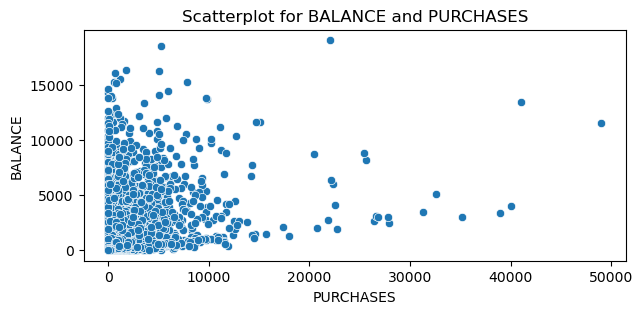

In [146]:
# Scatterplot
plt.figure(figsize=(7,3))
sns.scatterplot(x="PURCHASES", y="BALANCE", data=df)
plt.title(f"Scatterplot for BALANCE and PURCHASES")
plt.show()

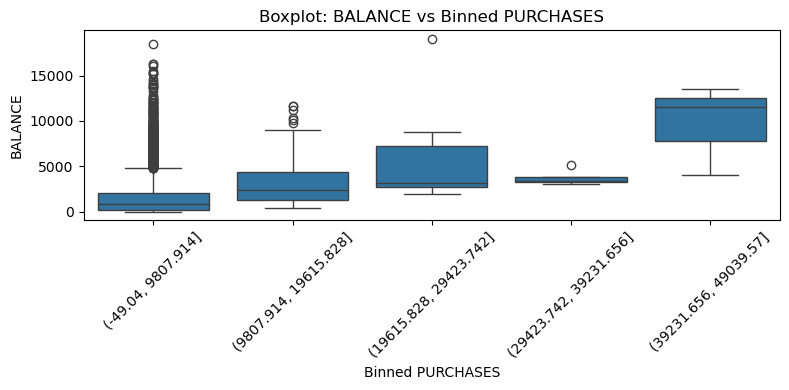

In [147]:
# Step 1: Bin the x-variable (PURCHASES)
df['PURCHASES_BIN'] = pd.cut(df['PURCHASES'], bins=5)

# Step 2: Create the box plot with y = BALANCE
plt.figure(figsize=(8, 4))
sns.boxplot(x='PURCHASES_BIN', y='BALANCE', data=df)

plt.title("Boxplot: BALANCE vs Binned PURCHASES")
plt.xlabel("Binned PURCHASES")
plt.ylabel("BALANCE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- `BALANCE` vs `PURCHASES` shows that customers that has lower balance tend to do more purchases using their credit card borrowing from the bank
- From the scatter plot, all group has similar spread except the fourth group, highest median is in the highest group, which means customers that did more purchases has higher balance

### 4.4. CASH_ADVANCE and CREDIT LIMIT

- `CASH_ADVANCE` does not reflect retail transactions but rather borrowing against credit.<br>
- It has its own different intent and risk implications.<br>
- To understand further, it is the direct withdrawal of cash from credit line.<br>
- It usually incurs higher fees and interest rates.<br>
- Often signals liquidity strain, urgency, or a different use case than typical purchases.<br>
- Combining them can show whether customers are withdrawing cash out of necessity by overextending their credit or simply because they have the room to do so, which helps detecting risky customers
- It is expected that most customers will use cash advance according to their credit limit

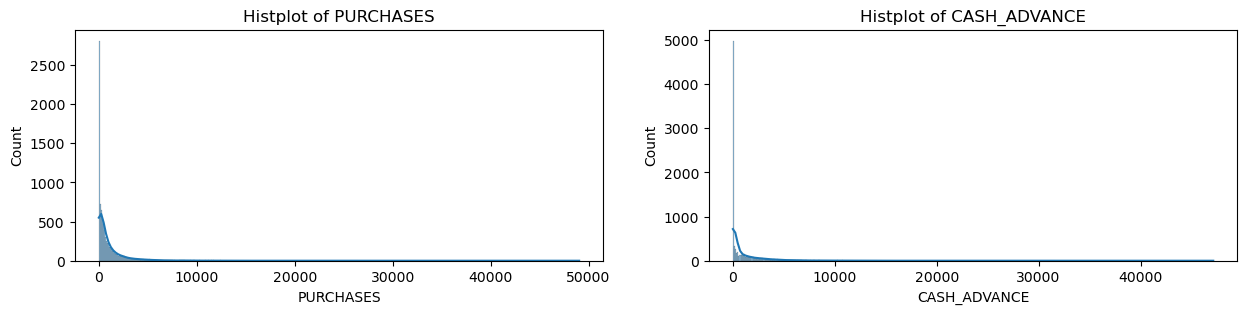

In [148]:
# PURCHASE and CASH ADVANCE
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(x=df["PURCHASES"], kde=True)
plt.title(f"Histplot of PURCHASES")

plt.subplot(1,2,2)
sns.histplot(x=df["CASH_ADVANCE"], kde=True)
plt.title(f"Histplot of CASH_ADVANCE")
plt.show()

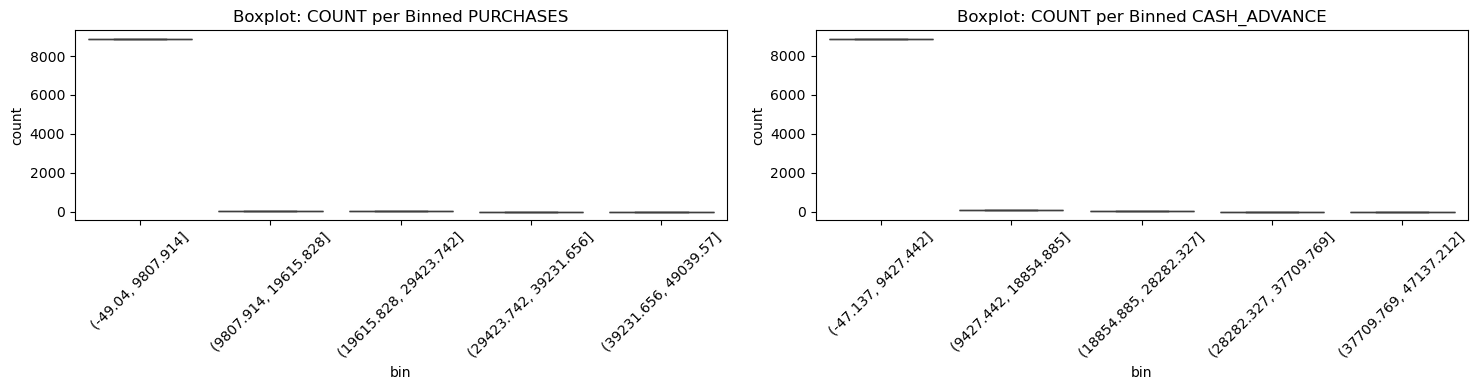

In [149]:
# Step 1: Bin the histogram variables
df['PURCHASES_BIN'] = pd.cut(df['PURCHASES'], bins=5)
df['CASH_ADVANCE_BIN'] = pd.cut(df['CASH_ADVANCE'], bins=5)

# Step 2: Get count per bin
purchases_count = df['PURCHASES_BIN'].value_counts().sort_index().reset_index()
purchases_count.columns = ['bin', 'count']

cash_advance_count = df['CASH_ADVANCE_BIN'].value_counts().sort_index().reset_index()
cash_advance_count.columns = ['bin', 'count']

# Step 3: Plot stacked box plots with COUNT as y-axis
plt.figure(figsize=(15, 4))

# Plot 1: PURCHASES
plt.subplot(1, 2, 1)
sns.boxplot(x='bin', y='count', data=purchases_count)
plt.title("Boxplot: COUNT per Binned PURCHASES")
plt.xticks(rotation=45)

# Plot 2: CASH_ADVANCE
plt.subplot(1, 2, 2)
sns.boxplot(x='bin', y='count', data=cash_advance_count)
plt.title("Boxplot: COUNT per Binned CASH_ADVANCE")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


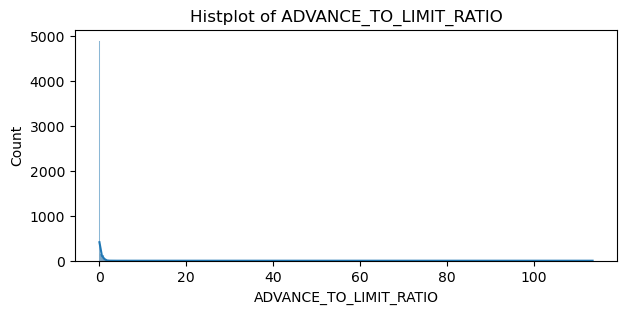

In [150]:
# Ratio to CREDIT_LIMIT
df["ADVANCE_TO_LIMIT_RATIO"] = df["CASH_ADVANCE"] / df["CREDIT_LIMIT"].replace(0, np.nan)

plt.figure(figsize=(7,3))
sns.histplot(x=df["ADVANCE_TO_LIMIT_RATIO"], kde=True)
plt.title(f"Histplot of ADVANCE_TO_LIMIT_RATIO")
plt.show()

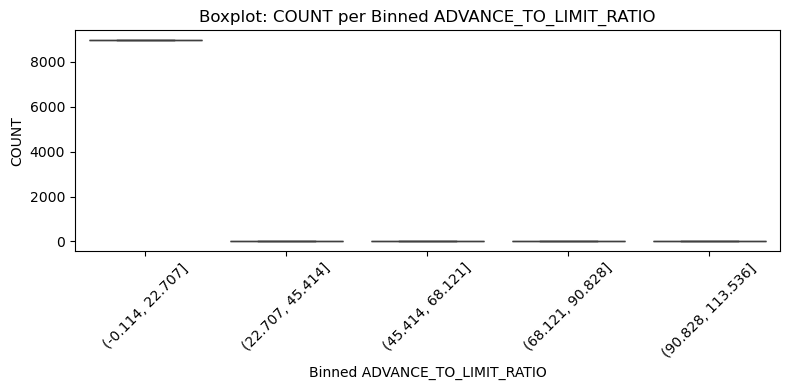

In [151]:
# Step 1: Calculate ratio safely
df["ADVANCE_TO_LIMIT_RATIO"] = df["CASH_ADVANCE"] / df["CREDIT_LIMIT"].replace(0, np.nan)

# Step 2: Bin the ADVANCE_TO_LIMIT_RATIO into 5 bins
df['ADV_RATIO_BIN'] = pd.cut(df['ADVANCE_TO_LIMIT_RATIO'], bins=5)

# Step 3: Count how many records per bin
ratio_count = df['ADV_RATIO_BIN'].value_counts().sort_index().reset_index()
ratio_count.columns = ['bin', 'count']

# Step 4: Plot stacked box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='bin', y='count', data=ratio_count)

plt.title("Boxplot: COUNT per Binned ADVANCE_TO_LIMIT_RATIO")
plt.xlabel("Binned ADVANCE_TO_LIMIT_RATIO")
plt.ylabel("COUNT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**<br>
- The distribution of `CASH_ADVANCE` and the `ADVANCE_TO_LIMIT_RATIO` is highly right skewed with most values concentrated near 0.<br>
- This means that the majority of users don't use cash advances at all or do so sparingly relative to their credit limit.<br>
- The long tail reaching towards 100 for the ratio suggests a small subset of users are heavily dependent on cash advances.<br>
- This is a potential risk or financially strained individuals.

In [152]:
# Define heavy cash users
df["HEAVY_CASH_USER"] = df["ADVANCE_TO_LIMIT_RATIO"] > 0.5
df["HEAVY_CASH_USER"].value_counts()

HEAVY_CASH_USER
False    7256
True     1694
Name: count, dtype: int64

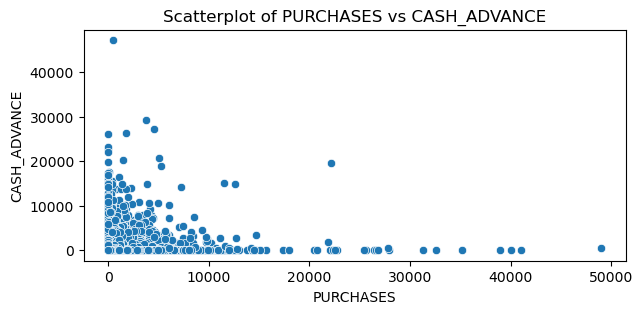

In [153]:
# PURCHASES vs CASH_ADVANCE
plt.figure(figsize=(7,3))
sns.scatterplot(x="PURCHASES", y="CASH_ADVANCE", data=df)
plt.title(f"Scatterplot of PURCHASES vs CASH_ADVANCE")
plt.show()

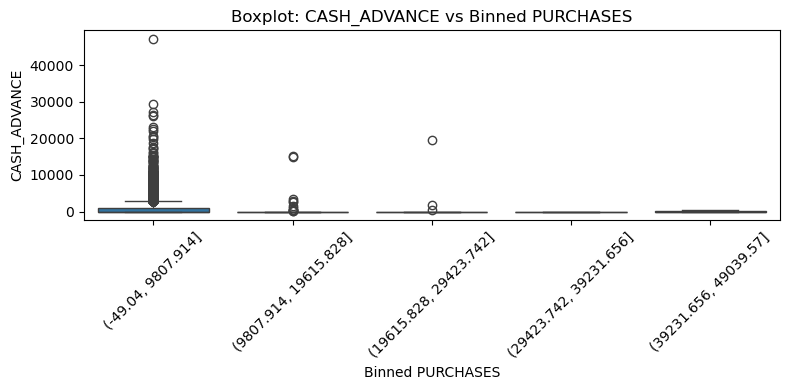

In [154]:
# Step 1: Bin the x-variable (PURCHASES)
df['PURCHASES_BIN'] = pd.cut(df['PURCHASES'], bins=5)

# Step 2: Plot boxplot with x = binned PURCHASES, y = CASH_ADVANCE
plt.figure(figsize=(8, 4))
sns.boxplot(x='PURCHASES_BIN', y='CASH_ADVANCE', data=df)

plt.title("Boxplot: CASH_ADVANCE vs Binned PURCHASES")
plt.xlabel("Binned PURCHASES")
plt.ylabel("CASH_ADVANCE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the stacked scatterplot, it can be seen that : 
- all group has similar spread (less variations)
- all group has similar median with lowest group has a bit higher median which means PURCHASES does not affect cash advance behaviour that significant but customers with low purchases tend to draw cash more than customers who did purchases more frequently

**Analysis**<br>
- Most points are near the origin at low purchases and low cash advances<br>
- There is no clear linear correlation (coefficient of -0.05) which aligns with behavioural reality that cash advance is used for liquidity while purchases reflect spending style.<br>
- There are a few users with high `CASH_ADVANCE` and low `PURCHASES`.<br>
- They might represent emergency cash users and dormant retail behaviour but active borrowing.<br><br>
- Cash advance needs to be treated as a standalone feature in the segmentation.<br>
- Users who lean or rely on it heavily might require separate profiling.

### 4.5. PURCHASES & CASH_ADVANCE

- This analysis helps understanding customers' behaviour in spending, whether they like using their credit card or withdrawing cash
- Similar to purchasing style, it is expected that customers will tilt to one side rather than the other.

In [155]:
# Monetary behaviour CASH_ADVANCE vs PURCHASES
df["TOTAL_SPENDING"] = df["PURCHASES"] + df["CASH_ADVANCE"]

In [156]:
# Ratios to total spending
df["PURCHASE_RATIO"] = df["PURCHASES"] / df["TOTAL_SPENDING"].replace(0, np.nan)
df["CASH_ADVANCE_RATIO"] = df["CASH_ADVANCE"] / df["TOTAL_SPENDING"].replace(0, np.nan)

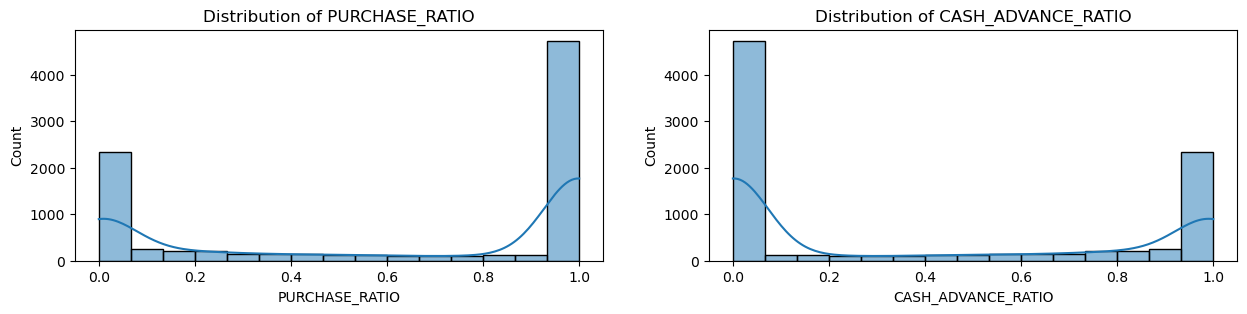

In [157]:
# Ratio Histogram
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(x = df["PURCHASE_RATIO"], kde=True)
plt.title("Distribution of PURCHASE_RATIO")

plt.subplot(1,2,2)
sns.histplot(df["CASH_ADVANCE_RATIO"], kde=True)
plt.title("Distribution of CASH_ADVANCE_RATIO")
plt.show()

In [158]:
def classify_monetary_style(row):
    if row["PURCHASE_RATIO"] >= 0.8:
        return "Retail-Focused"
    elif row["CASH_ADVANCE_RATIO"] >= 0.8:
        return "Cash-Focused"
    else:
        return "Mixed-Monetary"

df["MONETARY_STYLE"] = df.apply(classify_monetary_style, axis=1)
df["MONETARY_STYLE"].value_counts()

MONETARY_STYLE
Retail-Focused    4971
Cash-Focused      2794
Mixed-Monetary    1185
Name: count, dtype: int64

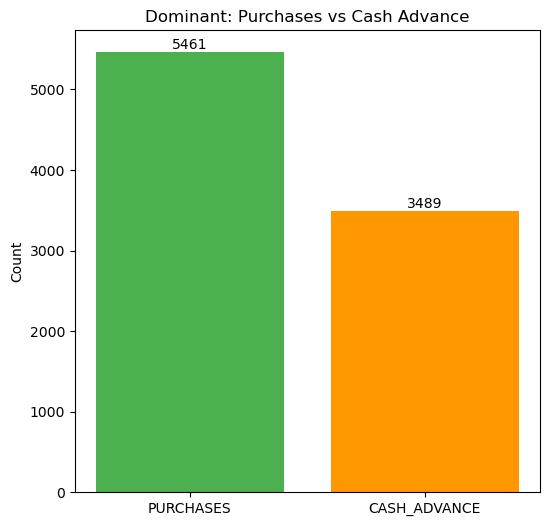

In [159]:
df['PURCHASES_VS_CASH_ADVANCE_DOMINANT'] = df.apply(
    lambda row: 'PURCHASES' if row['PURCHASES'] >= row['CASH_ADVANCE'] else 'CASH_ADVANCE',
    axis=1)
counts_pca = df['PURCHASES_VS_CASH_ADVANCE_DOMINANT'].value_counts()
plt.figure(figsize=(6, 6))
bars = plt.bar(counts_pca.index, counts_pca.values, color=['#4CAF50', '#FF9800'])
plt.title('Dominant: Purchases vs Cash Advance')
plt.ylabel('Count')
for bar, count in zip(bars, counts_pca.values):
    plt.text(bar.get_x() + bar.get_width()/2, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

**Analysis**<br>
- So it shows from the ratio graphs that around 56% of the users are retail focused while 31% are cash focused.<br>
- The rest of the 13% is mixed monetary.<br>

### 4.7. PAYMENTS & MINIMUM_PAYMENTS

- This analysis helps understanding whether customers are doing the bare minimum or proactively paying (risky vs not risky customers)
- Most customers will pay near the minimum payments because in most cases, the minimum payments is the amount they are comfortable with in paying the finance institution.

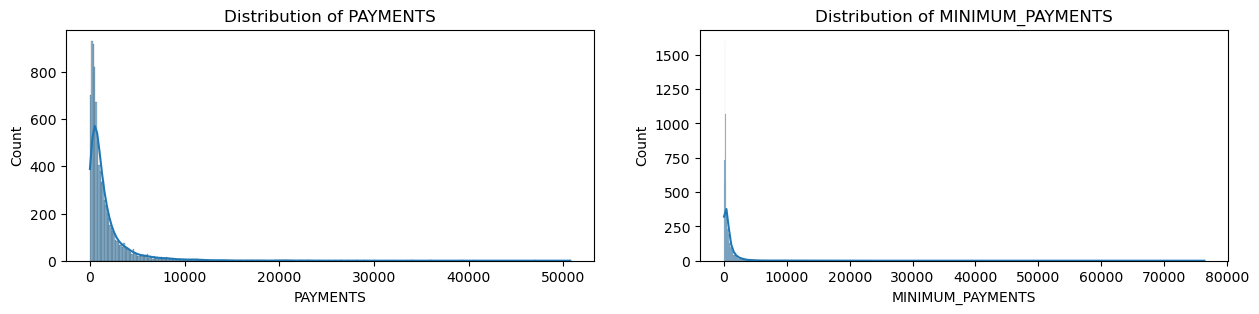

In [160]:
# Histogram for PAYMENTS and MINIMUM_PAYMENTS
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(x = df["PAYMENTS"], kde=True)
plt.title("Distribution of PAYMENTS")

plt.subplot(1,2,2)
sns.histplot(df["MINIMUM_PAYMENTS"], kde=True)
plt.title("Distribution of MINIMUM_PAYMENTS")
plt.show()

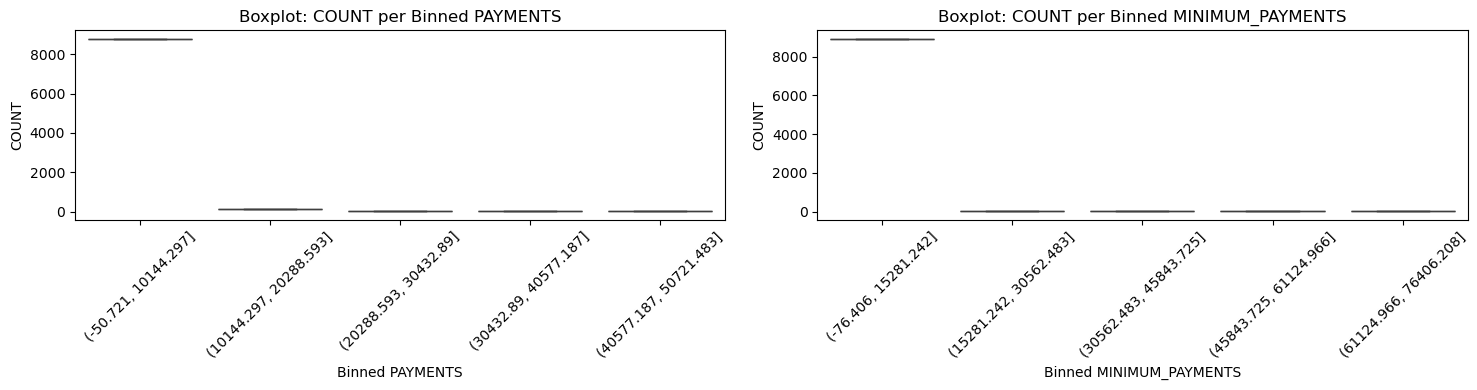

In [161]:
# Step 1: Bin the variables
df['PAYMENTS_BIN'] = pd.cut(df['PAYMENTS'], bins=5)
df['MIN_PAYMENTS_BIN'] = pd.cut(df['MINIMUM_PAYMENTS'], bins=5)

# Step 2: Count observations per bin
payments_count = df['PAYMENTS_BIN'].value_counts().sort_index().reset_index()
payments_count.columns = ['bin', 'count']

min_payments_count = df['MIN_PAYMENTS_BIN'].value_counts().sort_index().reset_index()
min_payments_count.columns = ['bin', 'count']

# Step 3: Plot the stacked box plots
plt.figure(figsize=(15, 4))

# PAYMENTS plot
plt.subplot(1, 2, 1)
sns.boxplot(x='bin', y='count', data=payments_count)
plt.title("Boxplot: COUNT per Binned PAYMENTS")
plt.xlabel("Binned PAYMENTS")
plt.ylabel("COUNT")
plt.xticks(rotation=45)

# MINIMUM_PAYMENTS plot
plt.subplot(1, 2, 2)
sns.boxplot(x='bin', y='count', data=min_payments_count)
plt.title("Boxplot: COUNT per Binned MINIMUM_PAYMENTS")
plt.xlabel("Binned MINIMUM_PAYMENTS")
plt.ylabel("COUNT")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [162]:
# Ratio for PAYMENTS and MINIMUM_PAYMENTS
df["PAYMENT_RATIO"] = df["PAYMENTS"] / df["MINIMUM_PAYMENTS"].replace(0, np.nan)

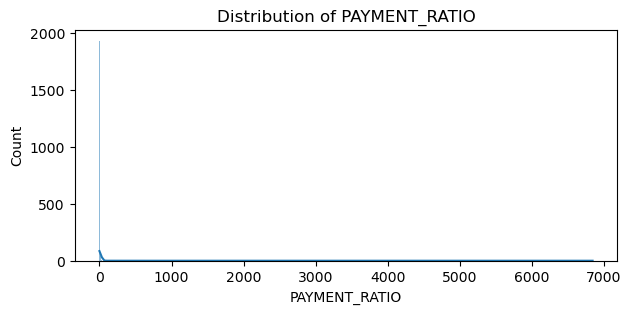

In [163]:
# Histogram for PAYMENT_RATIO
plt.figure(figsize=(7,3))
sns.histplot(df["PAYMENT_RATIO"], kde=True)
plt.title("Distribution of PAYMENT_RATIO")
plt.show()

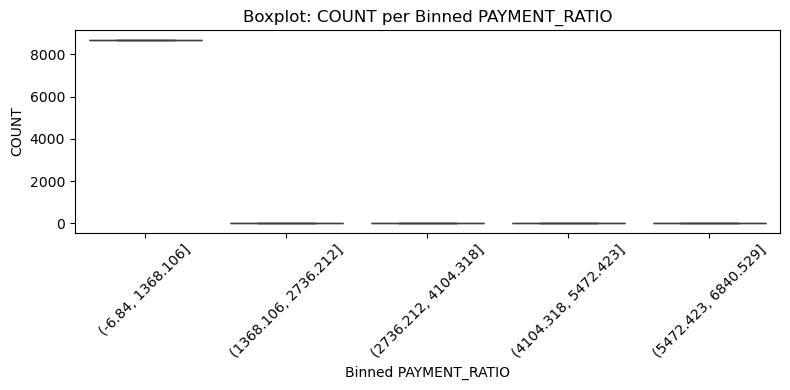

In [164]:
# Step 1: Bin PAYMENT_RATIO
df['PAYMENT_RATIO_BIN'] = pd.cut(df['PAYMENT_RATIO'], bins=5)

# Step 2: Count observations per bin
payment_ratio_count = df['PAYMENT_RATIO_BIN'].value_counts().sort_index().reset_index()
payment_ratio_count.columns = ['bin', 'count']

# Step 3: Plot the stacked box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='bin', y='count', data=payment_ratio_count)

plt.title("Boxplot: COUNT per Binned PAYMENT_RATIO")
plt.xlabel("Binned PAYMENT_RATIO")
plt.ylabel("COUNT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**<br>
- Distribution of `PAYMENTS` is highly right-skewed, which means that most users make low monthly payments.<br>
- While a small subset makes significantly large payments.<br>
- `MINIMUM_PAYMENTS` distribution is also right-skewed but slightly tighter than `PAYMENTS`.<br>
- This suggests that users have relatively low required minimums, which makes sense since the `BALANCE` are low for the majority.<br><br>
`PAYMENT_RATIO` is clearly right skewed.
- Ratio is around 1 means users meeting just the minimum, possibly revolving debt, interest-heavy
- Ratio more than 1 means paying more than required, this may signal financial discipline or payoff attempts.

In [165]:
def classify_payment_behavior(row):
    if row["PAYMENT_RATIO"] < 1:
        return "Under-Payer"
    elif row["PAYMENT_RATIO"] <= 1.2:
        return "Minimum Payer"
    elif row["PAYMENT_RATIO"] <= 2.5:
        return "Moderate Payer"
    else:
        return "Heavy Payer"

df["PAYMENT_BEHAVIOUR"] = df.apply(classify_payment_behavior, axis=1)

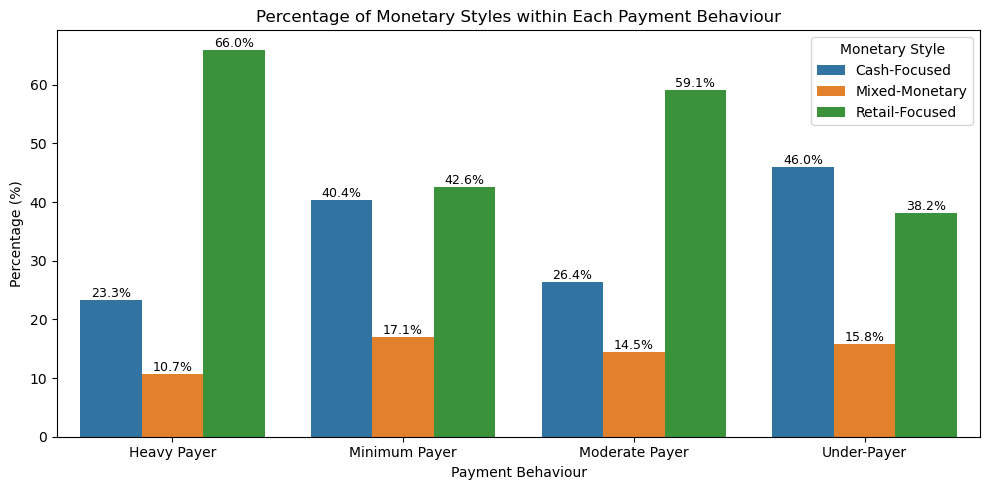

In [166]:
# group them by payment behaviour and monetary style
grouped = (
    df.groupby(['PAYMENT_BEHAVIOUR', 'MONETARY_STYLE'])
    .size()
    .reset_index(name='count')
)

# calcualte the percentage
grouped['percent'] = (
    grouped.groupby('PAYMENT_BEHAVIOUR')['count']
    .transform(lambda x: x / x.sum() * 100)
)

# graphs
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=grouped,
    x='PAYMENT_BEHAVIOUR',
    y='percent',
    hue='MONETARY_STYLE'
)
plt.title("Percentage of Monetary Styles within Each Payment Behaviour")
plt.ylabel("Percentage (%)")
plt.xlabel("Payment Behaviour")
plt.legend(title="Monetary Style")

# annoatet with percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

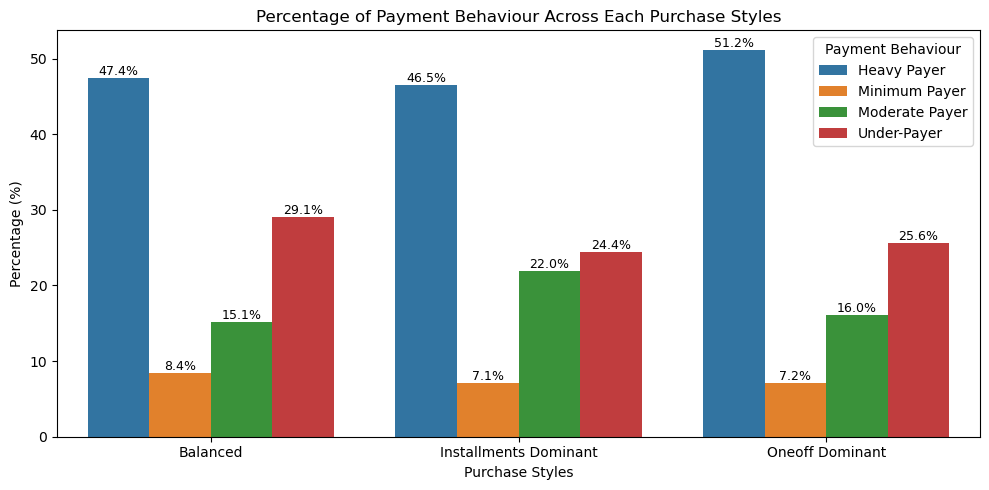

In [167]:
# group them by payment behaviour and monetary style
grouped = (
    df.groupby(['PAYMENT_BEHAVIOUR', 'PURCHASE_STYLE'])
    .size()
    .reset_index(name='count')
)

# calcualte the percentage
grouped['percent'] = (
    grouped.groupby('PURCHASE_STYLE')['count']
    .transform(lambda x: x / x.sum() * 100)
)

# graphs
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=grouped,
    x='PURCHASE_STYLE',
    y='percent',
    hue='PAYMENT_BEHAVIOUR'
)
plt.title("Percentage of Payment Behaviour Across Each Purchase Styles")
plt.ylabel("Percentage (%)")
plt.xlabel("Purchase Styles")
plt.legend(title="Payment Behaviour")

# annoatet with percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Analysis**<br>
- Retail focused groups tend to be heavy payers.<br>
- Whereas cash focused groups are more under payers and heavy payers side by side.<br>
- For mixed monetary, there are more heavy payers.<br><br>
Heavy payers dominate across all purcahse styles but the proportions vary.
- installments dominant and balanced users show slightly higher heavy payer counts
- oneoff dominant users have more under payers and minimum payers proportionally

### 4.8. BALANCE & CREDIT LIMIT

- Helps calculate credit utilization which can be indicator of risk
- High utilization is associated with financial stress and thus more risky
- Most customer would have balance according to their credit limit

In [168]:
# Ratio for BALANCE and CREDIT_LIMIT
df["BALANCE_TO_LIMIT"] = df["BALANCE"] / df["CREDIT_LIMIT"].replace(0, np.nan)

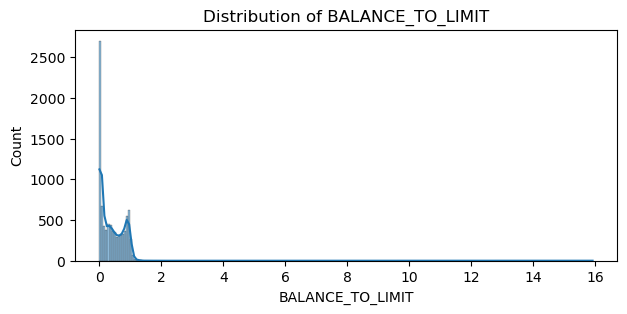

In [169]:
# Histogram
plt.figure(figsize=(7,3))
sns.histplot(df["BALANCE_TO_LIMIT"], kde=True)
plt.title("Distribution of BALANCE_TO_LIMIT")
plt.show()

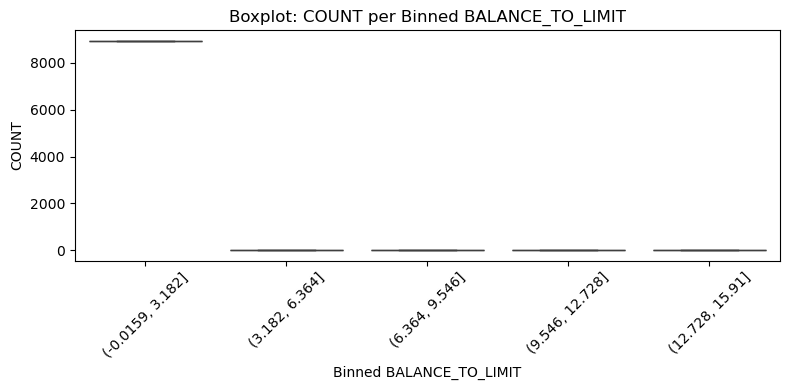

In [170]:
# Step 1: Bin BALANCE_TO_LIMIT
df['BALANCE_TO_LIMIT_BIN'] = pd.cut(df['BALANCE_TO_LIMIT'], bins=5)

# Step 2: Count per bin
balance_limit_count = df['BALANCE_TO_LIMIT_BIN'].value_counts().sort_index().reset_index()
balance_limit_count.columns = ['bin', 'count']

# Step 3: Plot box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='bin', y='count', data=balance_limit_count)

plt.title("Boxplot: COUNT per Binned BALANCE_TO_LIMIT")
plt.xlabel("Binned BALANCE_TO_LIMIT")
plt.ylabel("COUNT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


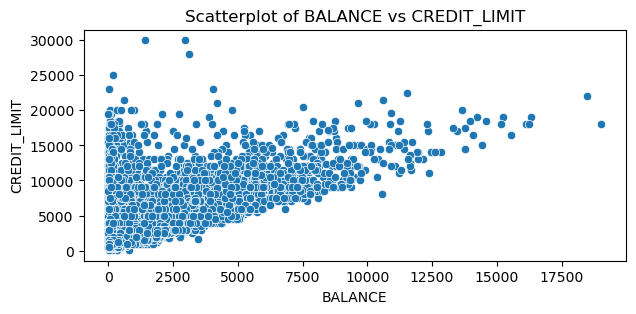

In [171]:
plt.figure(figsize=(7,3))
sns.scatterplot(x="BALANCE", y="CREDIT_LIMIT", data=df)
plt.title(f"Scatterplot of BALANCE vs CREDIT_LIMIT")
plt.show()

**Analysis**<br>
- This plot shows heavily right skewed distribution clustered toward low `BALANCE_TO_LIMIT` value with stom stretching far beyond 1.<br>
- This means that most users have very little available credit, meaning they've actively spending and approaching their credit limits.<br>
- The long tail beyond 1 suggests some users show more available balance than their reported credit limit.<br><br>
Could be due to:
- Data misalignment
- Systemic buffer or credit overflow flags
- Misinterpretation of how credit limits were recorded

`BALANCE` and `CREDIT_LIMIT` has positive correlation which makes sense since customers with more balance will gain more trust from the bank and thus having more credit limit

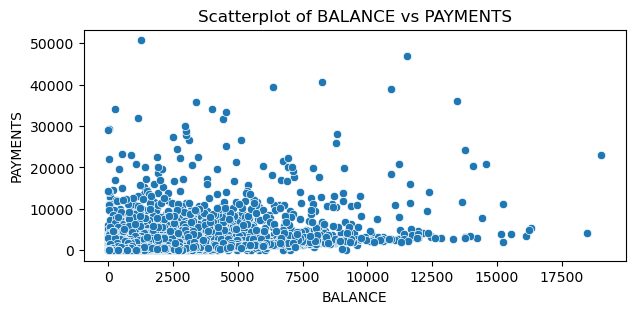

In [172]:
plt.figure(figsize=(7,3))
sns.scatterplot(x="BALANCE", y="PAYMENTS", data=df)
plt.title(f"Scatterplot of BALANCE vs PAYMENTS")
plt.show()

**Analysis**<br>
- Customers with higher `BALANCE` has higher `PAYMENTS` although its not that linear.<br>
- Customers with lower balance also has a great amount of payments even more than the higher balance, this may be caused by lower balanced customers has more purchases as well <br>
- Generally, customers bulked below PAYMENTS of 20000 and below the BALANCE of 12500. The scatter plot also shows an interesting distribution as it shaped like a cone with the smaller side on the higher balance.

### 4.9. MORE INSIGHTS

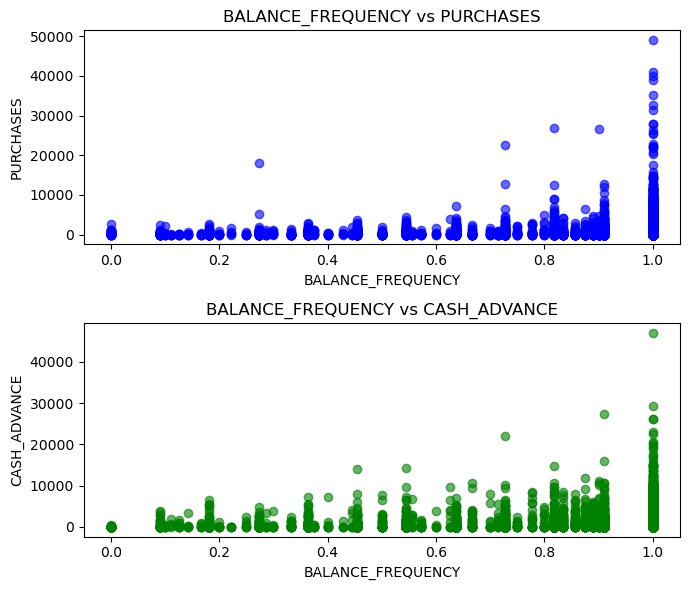

In [173]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))  # 4 rows, 1 column

# Plot 1
axs[0].scatter(df['BALANCE_FREQUENCY'], df['PURCHASES'], alpha=0.6, color='blue')
axs[0].set_title('BALANCE_FREQUENCY vs PURCHASES')
axs[0].set_xlabel('BALANCE_FREQUENCY')
axs[0].set_ylabel('PURCHASES')

# Plot 2
axs[1].scatter(df['BALANCE_FREQUENCY'], df['CASH_ADVANCE'], alpha=0.6, color='green')
axs[1].set_title('BALANCE_FREQUENCY vs CASH_ADVANCE')
axs[1].set_xlabel('BALANCE_FREQUENCY')
axs[1].set_ylabel('CASH_ADVANCE')

# Adjust layout
plt.tight_layout()
plt.show()

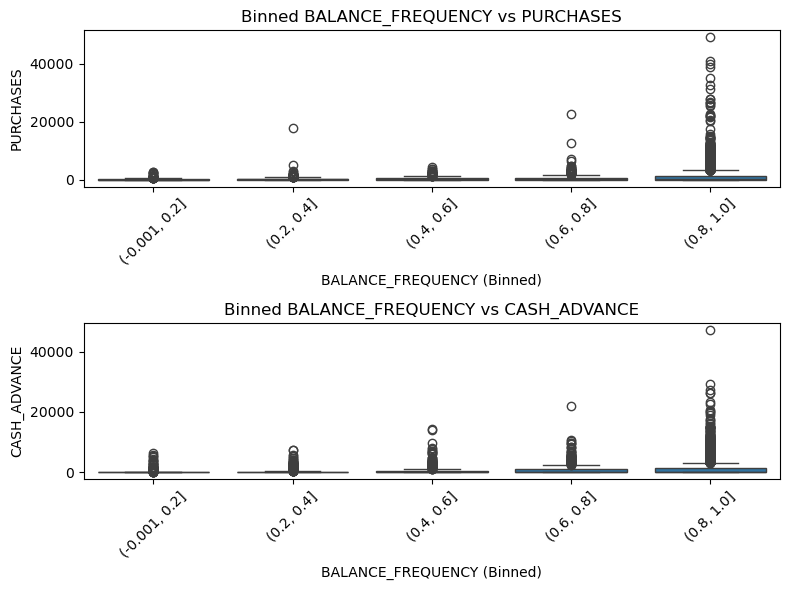

In [174]:
# Bin BALANCE_FREQUENCY into 5 groups
df['BALANCE_FREQ_BIN'] = pd.cut(df['BALANCE_FREQUENCY'], bins=5)

# Set up the plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Boxplot 1: PURCHASES per BALANCE_FREQUENCY bin
sns.boxplot(x='BALANCE_FREQ_BIN', y='PURCHASES', data=df, ax=axs[0])
axs[0].set_title('Binned BALANCE_FREQUENCY vs PURCHASES')
axs[0].set_xlabel('BALANCE_FREQUENCY (Binned)')
axs[0].set_ylabel('PURCHASES')
axs[0].tick_params(axis='x', rotation=45)

# Boxplot 2: CASH_ADVANCE per BALANCE_FREQUENCY bin
sns.boxplot(x='BALANCE_FREQ_BIN', y='CASH_ADVANCE', data=df, ax=axs[1])
axs[1].set_title('Binned BALANCE_FREQUENCY vs CASH_ADVANCE')
axs[1].set_xlabel('BALANCE_FREQUENCY (Binned)')
axs[1].set_ylabel('CASH_ADVANCE')
axs[1].tick_params(axis='x', rotation=45)

# Layout fix
plt.tight_layout()
plt.show()


**Analysis**<br>
- Higher `BALANCE_FREQUENCY` means more `PURCHASES` and `CASH_ADVANCE`
- Highest balance frequency group has slightly higher median and spread which means customers that has higher balance frequency has more purchases and casw withdrawal

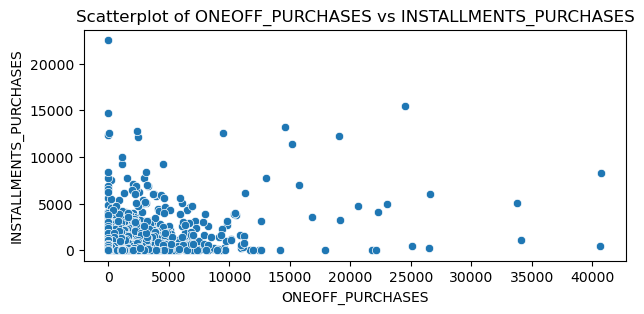

In [175]:
plt.figure(figsize=(7,3))
sns.scatterplot(x="ONEOFF_PURCHASES", y="INSTALLMENTS_PURCHASES", data=df)
plt.title(f"Scatterplot of ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES")
plt.show()

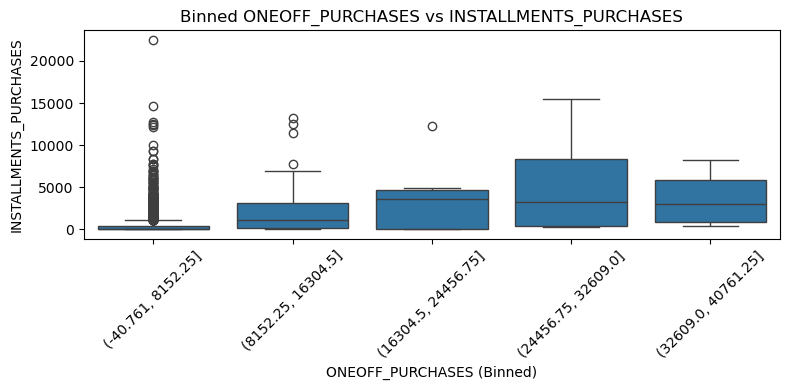

In [176]:
# Bin ONEOFF_PURCHASES into 5 intervals
df['ONEOFF_BIN'] = pd.cut(df['ONEOFF_PURCHASES'], bins=5)

# Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='ONEOFF_BIN', y='INSTALLMENTS_PURCHASES', data=df)
plt.title('Binned ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES')
plt.xlabel('ONEOFF_PURCHASES (Binned)')
plt.ylabel('INSTALLMENTS_PURCHASES')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**<br>
- `ONEOFF_PURCHASES` vs `INSTALLMENTS_PURCHASES` has segments on their own, some uses more than the other, but there are some that are close to balanced behavior
- Customer with moderate oneoff purchases (fourth group) has higher spread and median, which means customers with high moderate oneoff purchases also did more installments purchases

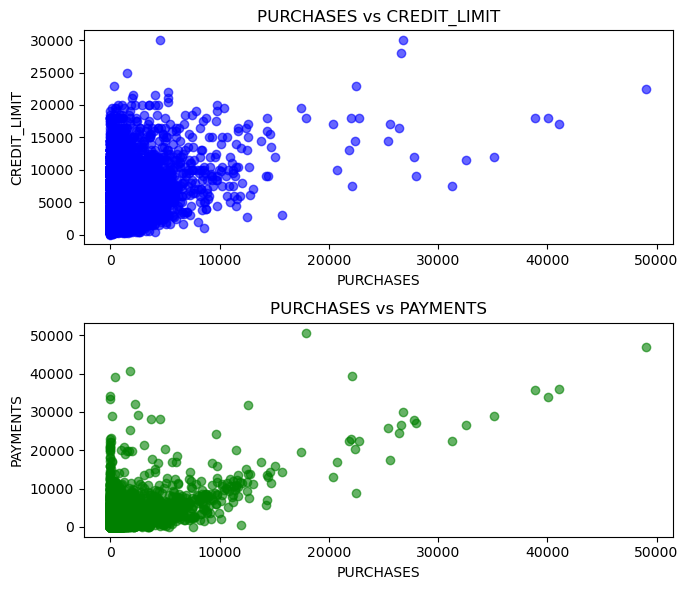

In [177]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))  # 4 rows, 1 column

# Plot 1
axs[0].scatter(df['PURCHASES'], df['CREDIT_LIMIT'], alpha=0.6, color='blue')
axs[0].set_title('PURCHASES vs CREDIT_LIMIT')
axs[0].set_xlabel('PURCHASES')
axs[0].set_ylabel('CREDIT_LIMIT')

# Plot 2
axs[1].scatter(df['PURCHASES'], df['PAYMENTS'], alpha=0.6, color='green')
axs[1].set_title('PURCHASES vs PAYMENTS')
axs[1].set_xlabel('PURCHASES')
axs[1].set_ylabel('PAYMENTS')

# Adjust layout
plt.tight_layout()
plt.show()

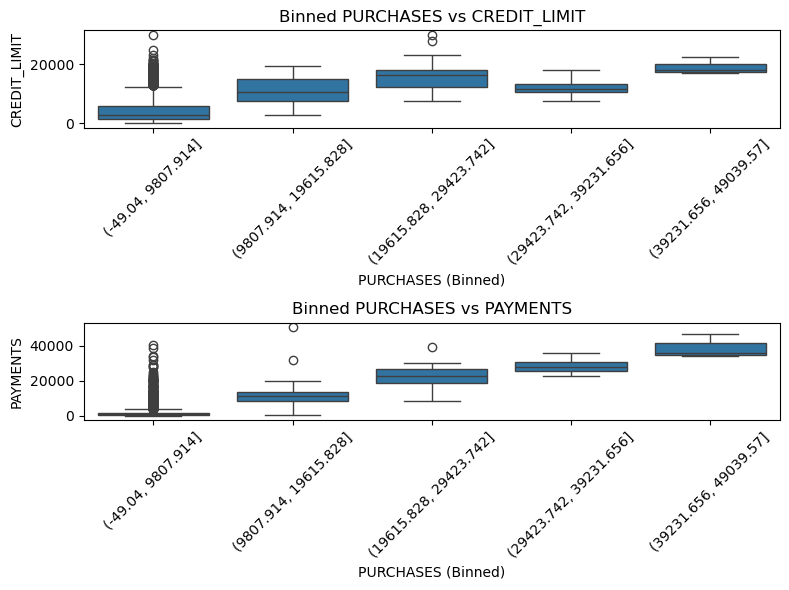

In [178]:
# Bin PURCHASES into 5 equal-width bins
df['PURCHASES_BIN'] = pd.cut(df['PURCHASES'], bins=5)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))  # 2 rows, 1 column

# Box Plot 1: CREDIT_LIMIT by PURCHASES_BIN
sns.boxplot(x='PURCHASES_BIN', y='CREDIT_LIMIT', data=df, ax=axs[0])
axs[0].set_title('Binned PURCHASES vs CREDIT_LIMIT')
axs[0].set_xlabel('PURCHASES (Binned)')
axs[0].set_ylabel('CREDIT_LIMIT')
axs[0].tick_params(axis='x', rotation=45)

# Box Plot 2: PAYMENTS by PURCHASES_BIN
sns.boxplot(x='PURCHASES_BIN', y='PAYMENTS', data=df, ax=axs[1])
axs[1].set_title('Binned PURCHASES vs PAYMENTS')
axs[1].set_xlabel('PURCHASES (Binned)')
axs[1].set_ylabel('PAYMENTS')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Analysis**<br>
- `PURCHASES` vs `CREDIT_LIMIT` and `PAYMENTS` both have positive correlations.<br>
- This shows that customers with higher credit limit tend to do higher purchases.<br>
- Then customers who did more purchases also made more payments
- From the scatterplot, it can be seen that : 
    - Customers with highest purchases has more credit limit as well (similar spread amongst groups)
    - Customers with higher purchases has more payments as well (similar spread amongst groups)

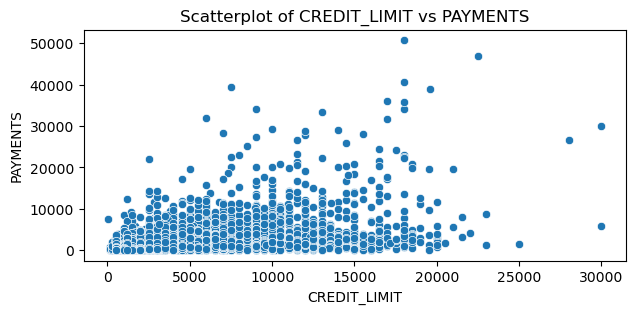

In [179]:
plt.figure(figsize=(7,3))
sns.scatterplot(x="CREDIT_LIMIT", y="PAYMENTS", data=df)
plt.title(f"Scatterplot of CREDIT_LIMIT vs PAYMENTS")
plt.show()

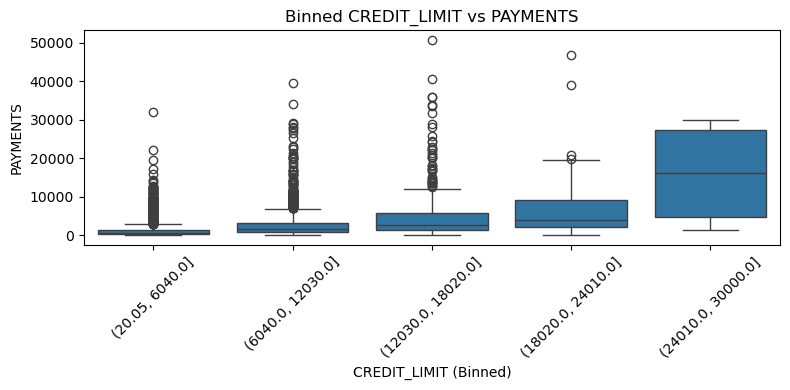

In [180]:
# Bin CREDIT_LIMIT into 5 equal-width intervals
df['CREDIT_BIN'] = pd.cut(df['CREDIT_LIMIT'], bins=5)

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='CREDIT_BIN', y='PAYMENTS', data=df)
plt.title('Binned CREDIT_LIMIT vs PAYMENTS')
plt.xlabel('CREDIT_LIMIT (Binned)')
plt.ylabel('PAYMENTS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**<br>
- Customers with moderate `CREDIT_LIMIT` make the bulk of `PAYMENTS` which means moderate segments is more active
- Customers with high credit limit has more spread and higher median, which means there are more customers variations of payments, but since the median is highest that means these customers did more payments than the others

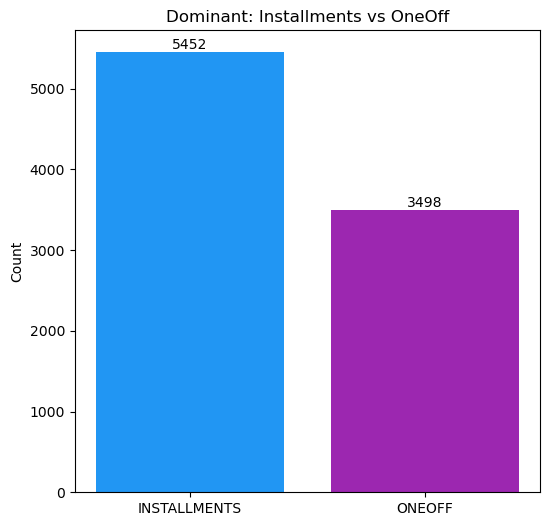

In [181]:
df['INSTALLMENTS_VS_ONEOFF_DOMINANT'] = df.apply(
    lambda row: 'INSTALLMENTS' if row['INSTALLMENTS_PURCHASES'] >= row['ONEOFF_PURCHASES'] else 'ONEOFF',
    axis=1)
counts_io = df['INSTALLMENTS_VS_ONEOFF_DOMINANT'].value_counts()
plt.figure(figsize=(6, 6))
bars = plt.bar(counts_io.index, counts_io.values, color=['#2196F3', '#9C27B0'])
plt.title('Dominant: Installments vs OneOff')
plt.ylabel('Count')
for bar, count in zip(bars, counts_io.values):
    plt.text(bar.get_x() + bar.get_width()/2, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

**Analysis**<br>
More customer did Installments than Oneoff purchasing

### 4.10. DETAILED DISTRIBUTION ANALYSIS

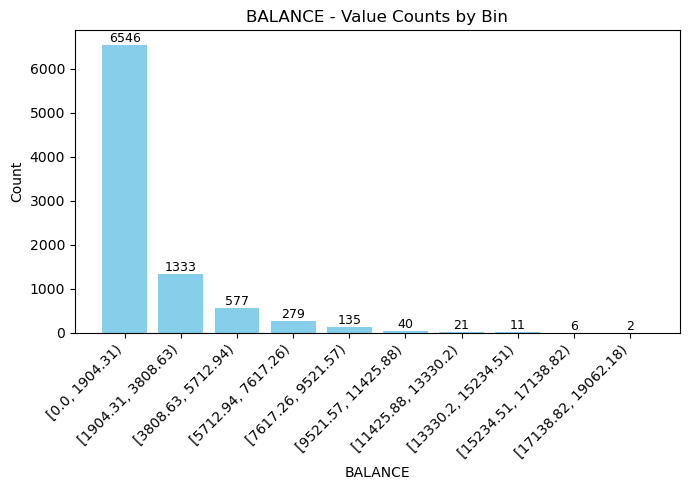

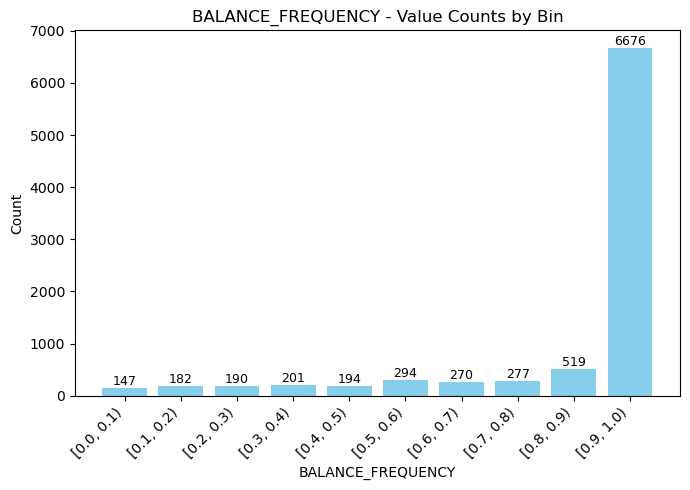

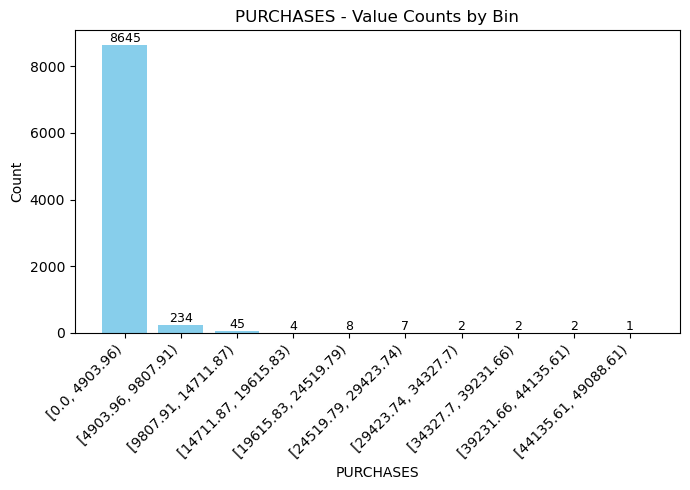

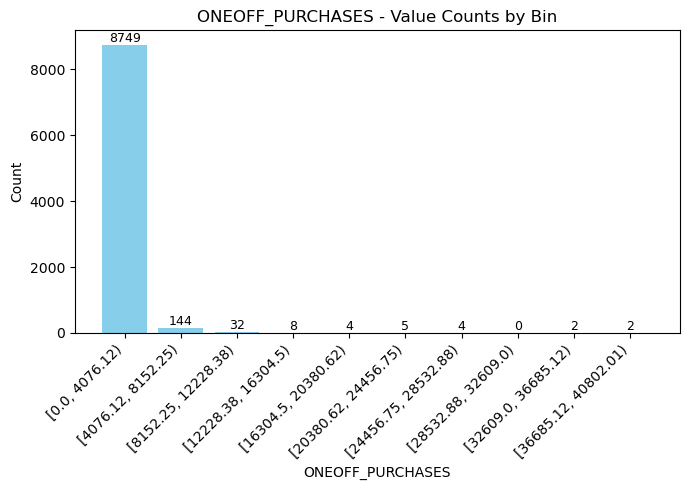

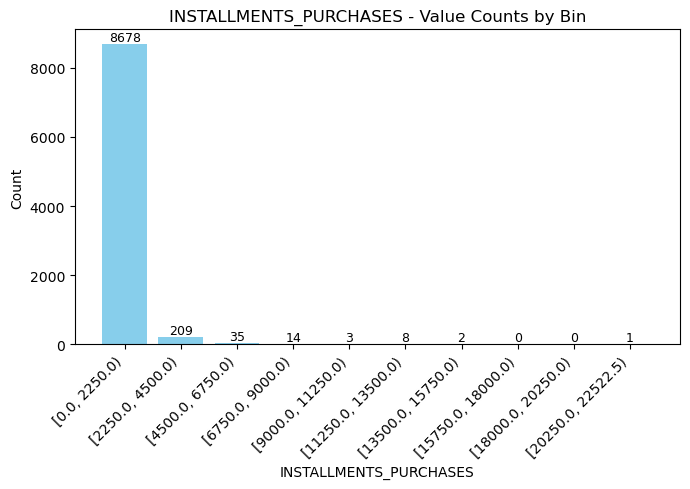

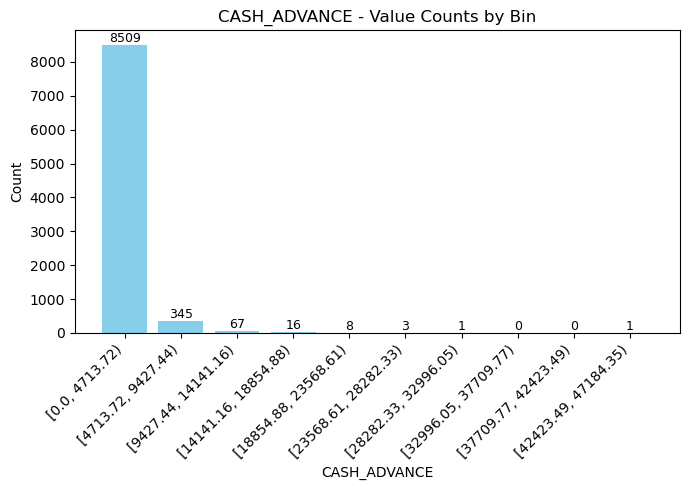

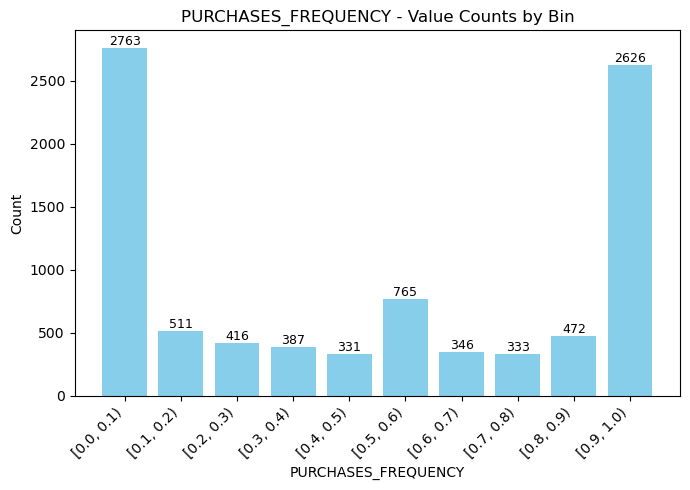

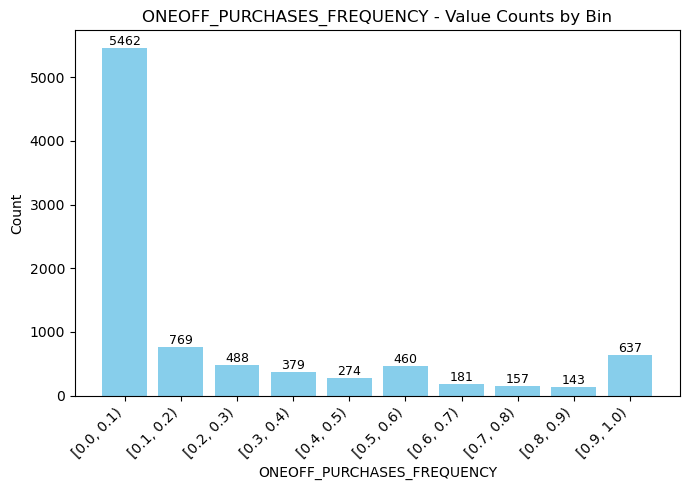

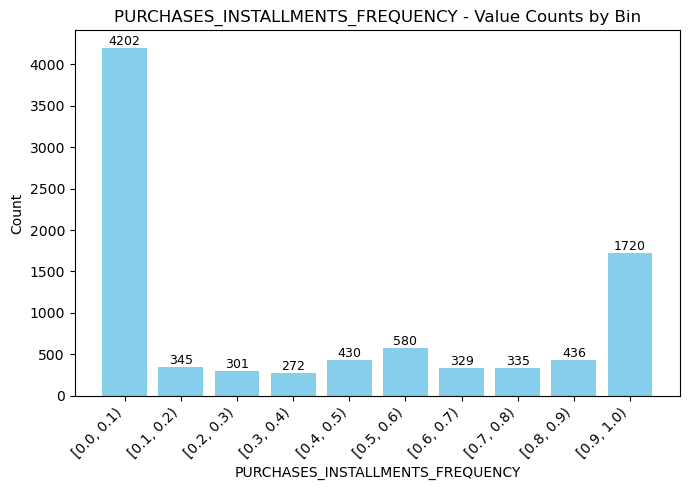

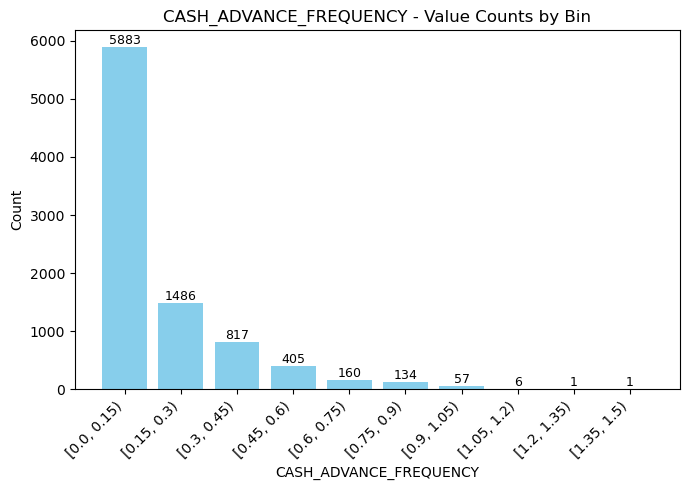

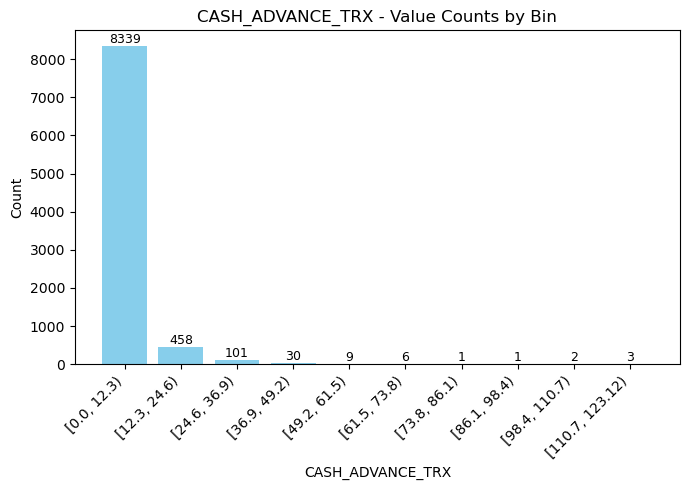

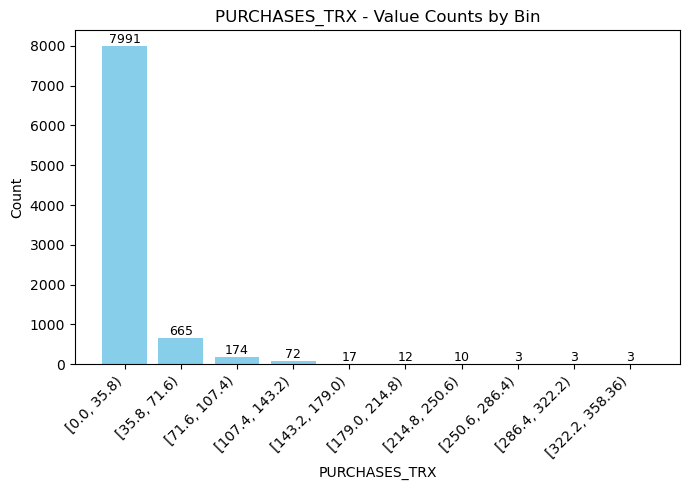

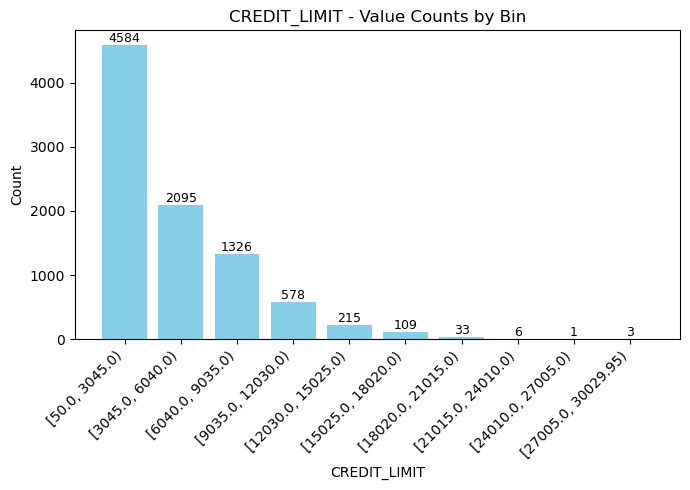

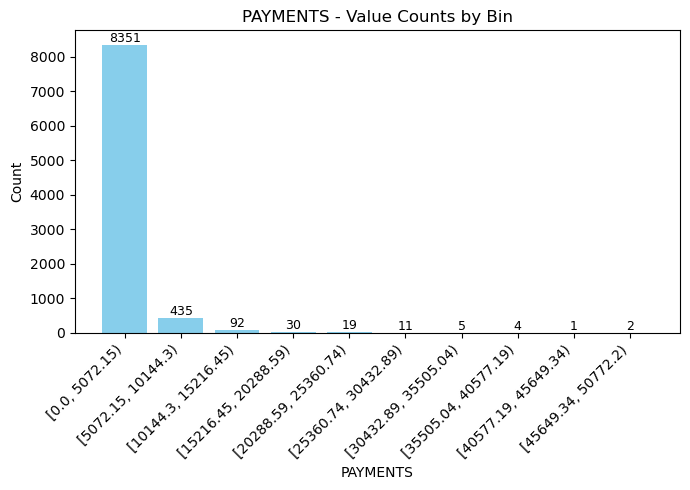

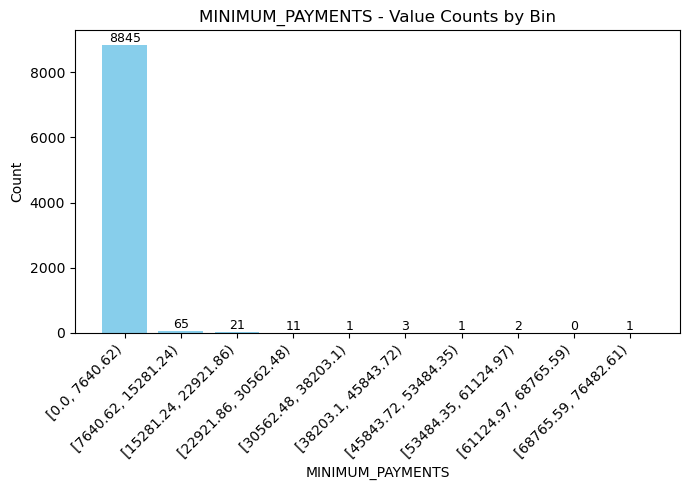

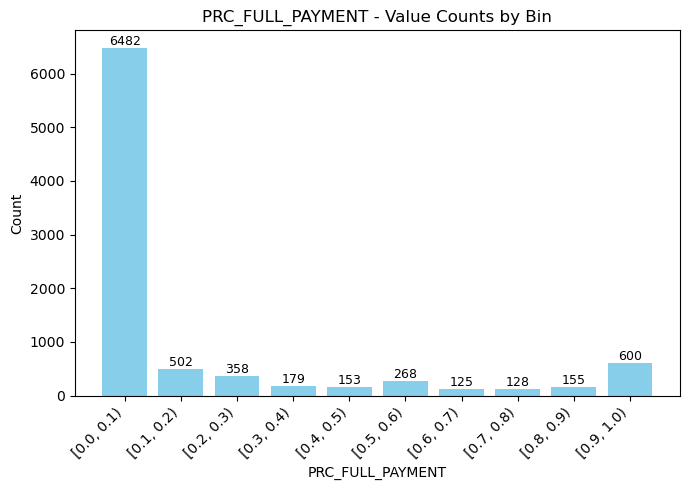

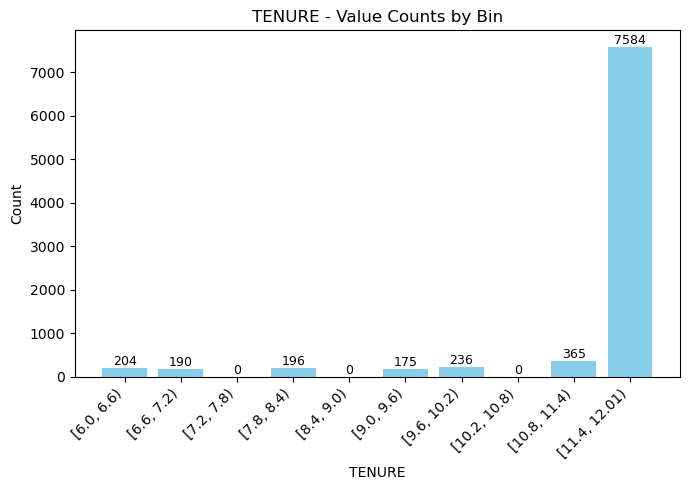

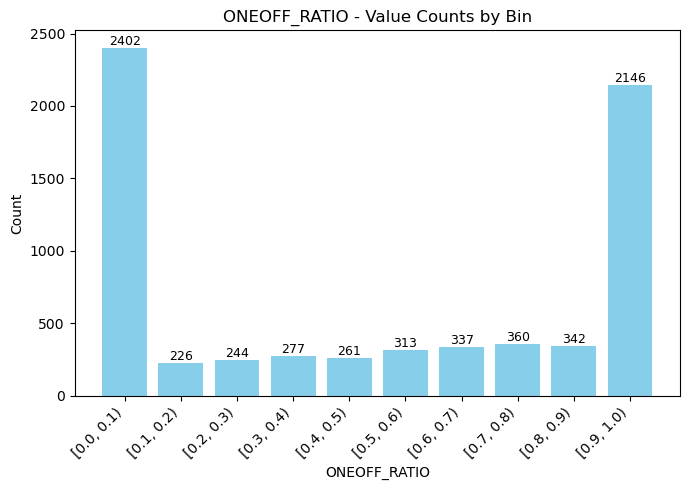

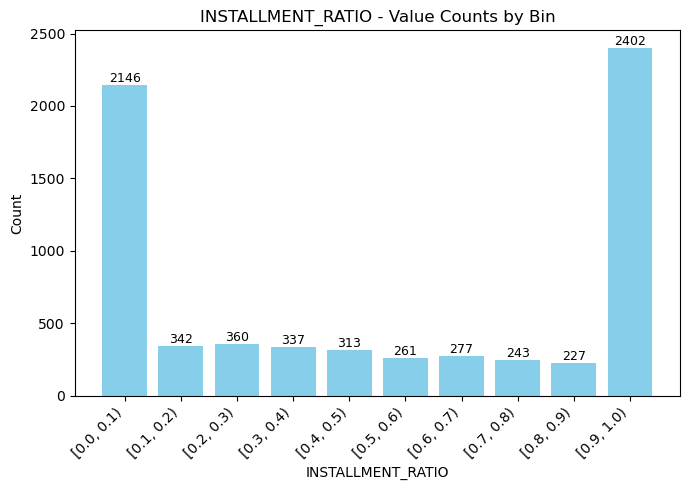

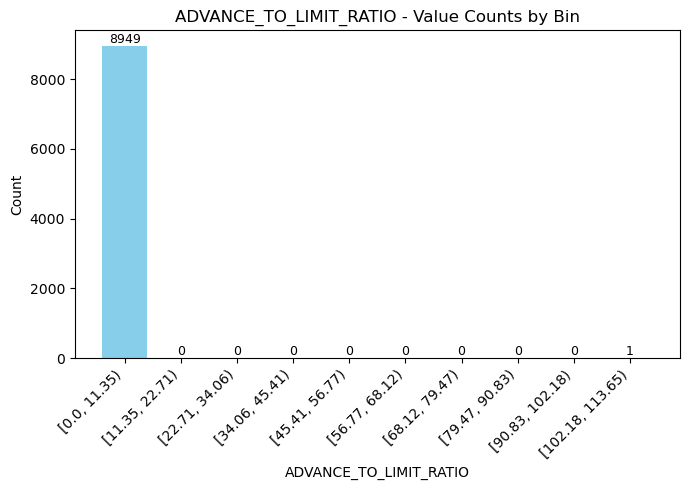

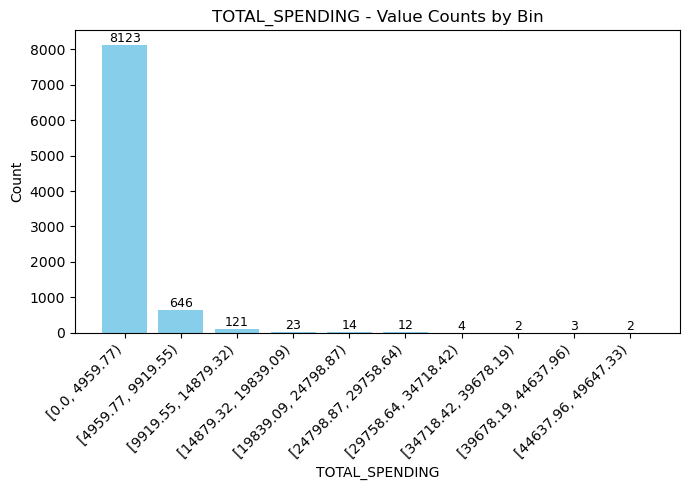

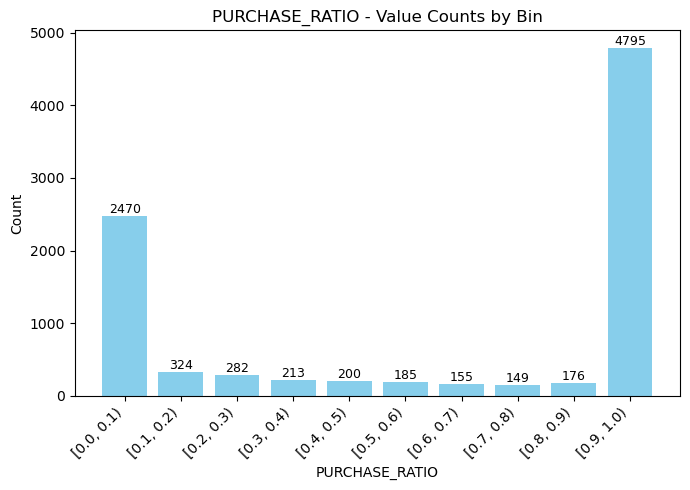

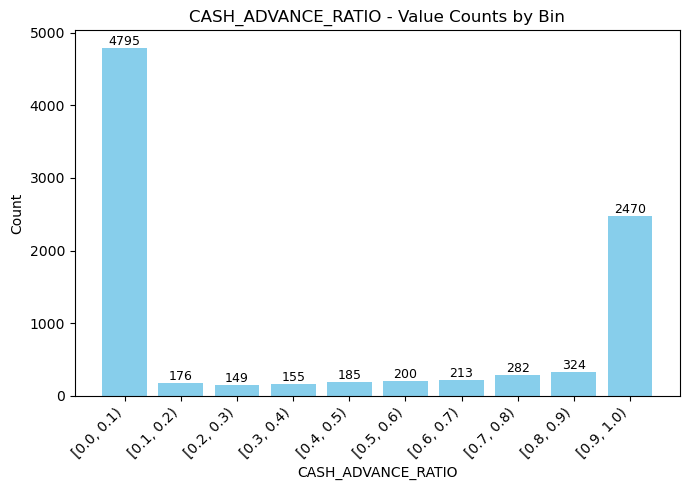

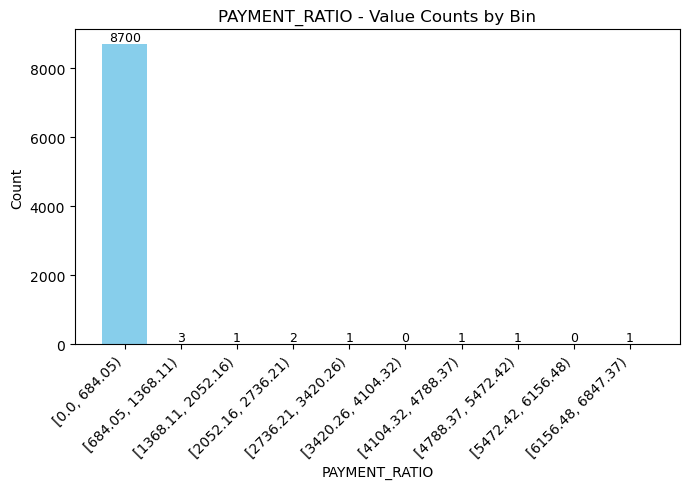

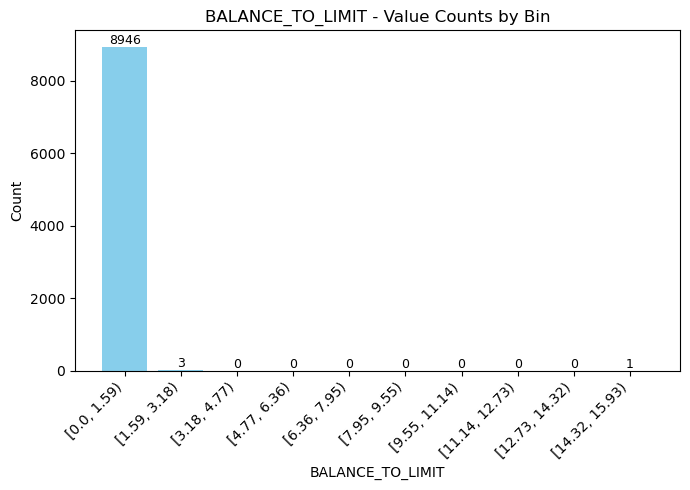

In [182]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    # Skip ID-like columns if needed
    if col.upper() in ['CUST_ID', 'ID', 'CUSTOMER_ID']:
        continue
    
    # Define number of bins — you can adjust
    num_bins = 10

    # Bin the data
    binned, bins = pd.cut(df[col], bins=num_bins, retbins=True, right=False)
    bin_counts = binned.value_counts().sort_index()

    # Make bin labels clearer: show [lower, upper)
    bin_labels = [f"[{round(bins[i],2)}, {round(bins[i+1],2)})" for i in range(len(bins)-1)]

    # Plot
    plt.figure(figsize=(7, 5))
    bars = plt.bar(bin_labels, bin_counts, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} - Value Counts by Bin')
    plt.xticks(rotation=45, ha='right')

    # Add counts on top
    for bar, count in zip(bars, bin_counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{count}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

## 5. Modeling

Using small curated set of features to perform initial segmentation offers several advantages in this credit card case.
- A conceptual alignment with the RFM principles which reduces dimensionality by design.
- Recency, Frequency, and Monetary captures core behavioural patterns without overwhelming the model with noise (reduce overfitting probability).
- Choosing just a few normalised and transformed features for clustering allows high signal to noise ratio and intuitive interpretability.
- Features like `PURCHASES_FREQUENCY`, `CASH_ADVANCE_TRX`, and `TOTAL_SPENDING` are direct proxies for engagement and transaction habits.
- Clustering gives a macro level behavioural segments which can differentiate with richer attributes later on.

- The dataset does not include a time feature to relate to the Recency of the model.<br>
- Therefore, the initial model is fed the Frequency and Monetary sections of the RFM concept.<br>
- Frequency here means how often a customer engages with the card.<br>
- While Monetary is how much they spend or withdraw.<br><br>

The clustering model used in this project is the K-Means clustering.
- The silhouette score is used to evaluate the performance of the algorithm
- The PCA projection uis also used to support the performance of the K-Means clustering

So in this case, Frequency is the following features:
- `PURCHASES_FREQUENCY`
- `CASH_ADVANCE_FREQUENCY`
- `PURCHASES_TRX`
- `CASH_ADVANCE_TRX`

While Monetary is the sum of the following features:
- `PURCHASES`
- `CASH_ADVANCE`

Where it is called the `TOTAL_SPENDING`

In [183]:
# Normality statistical test
normality_features = ["PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", 
                      "PURCHASES_TRX", "CASH_ADVANCE_TRX", "TOTAL_SPENDING"]

for feature in normality_features:

    subset = df[feature].dropna()
    stat, p = shapiro(subset)

    print(f"{feature} Shapiro-Wilk test")
    print(f"Statistic: {stat}")
    print(f"P-value: {p}")

    if p < 0.05:
        print(f"{feature} is not normally distributed.\n")
    else:
        print(f"{feature} is normally distributed.\n")

PURCHASES_FREQUENCY Shapiro-Wilk test
Statistic: 0.8404999572145995
P-value: 2.2702241938227953e-69
PURCHASES_FREQUENCY is not normally distributed.

CASH_ADVANCE_FREQUENCY Shapiro-Wilk test
Statistic: 0.7226217240088235
P-value: 3.8135274650699723e-81
CASH_ADVANCE_FREQUENCY is not normally distributed.

PURCHASES_TRX Shapiro-Wilk test
Statistic: 0.5744020891513338
P-value: 6.655037751008517e-91
PURCHASES_TRX is not normally distributed.

CASH_ADVANCE_TRX Shapiro-Wilk test
Statistic: 0.5071664750189775
P-value: 2.2376749867179517e-94
CASH_ADVANCE_TRX is not normally distributed.

TOTAL_SPENDING Shapiro-Wilk test
Statistic: 0.5917118436706197
P-value: 6.2279456634440115e-90
TOTAL_SPENDING is not normally distributed.



c:\Users\amfed\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8950.
  res = hypotest_fun_out(*samples, **kwds)


- All features used in for the clustering is not normally distributed.<br>
- This is proven in the Shapiro Wilk test above.<br>
- With that, it is justified to log the features as part of the transformation before feeding the data into the clustering algorithm.

In [184]:
# iniital clustering pipeline
def clustering_pipeline_kmeans(X, n_clusters, visualize=True):
    # initialize pipeline
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42))
    ])
    
    # fit and predict
    labels = pipeline.fit_predict(X)

    # evaluate silhouette score
    score = silhouette_score(X, labels)
    print(f"Initial Silhouette Score (K-Means, {n_clusters} clusters):", round(score, 4))
    
    # visualization
    if visualize:
        X_pca = PCA(n_components=2).fit_transform(X)
        plt.figure(figsize=(7, 6))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=30)
        plt.title(f"K-Means Clusters ({n_clusters}) - Initial PCA Projection")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.legend(*scatter.legend_elements(), title="Cluster")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    return labels

In [185]:
# streamlined clustering function without reclustering
def behavioral_clustering(df, n_clusters, visualize=True):
    # log transformations
    log_cols = ["PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", 
                "PURCHASES_TRX", "CASH_ADVANCE_TRX", "TOTAL_SPENDING"]
    
    for col in log_cols:
        df[f"{col}_log"] = np.log1p(df[col])

    # feature selection
    features = [f"{col}_log" for col in log_cols]
    X = df[features]

    # scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # clustering
    labels = clustering_pipeline_kmeans(X_scaled, n_clusters=n_clusters, visualize=visualize)
    df["CLUSTER"] = labels

    return df.head()

Initial Silhouette Score (K-Means, 4 clusters): 0.3925


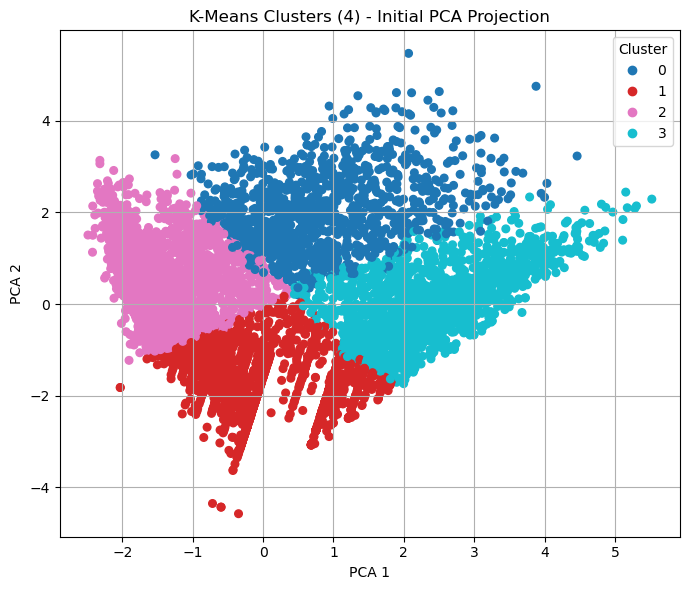

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  BALANCE_FREQ_BIN          ONEOFF_BIN  \
0                0.000000  ...        (0.8, 1.0]  (-40.761, 8152.25]   
1                0.250000  ...        (0.8, 1.0]  (-40.761, 8152.25]   
2                0.000000  ...        (0.8, 1.0]  (-40.761, 8152.25]   
3                0.083333  ...        (0.6, 0.8]  (-40.761, 8152.25]   
4                0.000000  ...        (0.8, 1.0]  (-40.761, 8152.25]   

          CREDIT_BIN  INSTALLMENTS_VS_ONEOFF_DOMINANT  \
0    (20.05, 6040.0]                     INSTALLMENTS   
1  (6040.0, 12030.0]                     INSTALLMENTS   
2  (6040.0, 12030.0]                           ONEOFF   
3  (6040.0, 12030.0]                           ONEOFF   
4    (20.05, 6040.0]                           ONEOFF   

   PURCHASES_FREQUENCY_log  CASH_ADVANCE_FREQUENCY_log  PURCHASES_TRX_log  \
0                 0.154151                    0.000000           1.098612   
1                 0.000000                    0.223144           0.000000   
2                 0.693147                    0.000000           2.564949   
3                 0.080042                    0.080042           0.693147   
4                 0.080042                    0.000000           0.693147   

  CASH_ADVANCE_TRX_log TOTAL_SPENDING_log CLUSTER  
0             0.000000           4.568506       1  
1             1.609438           8.770896       3  
2             0.000000           6.651791       2  
3             0.693147           7.441782       1  
4             0.000000           2.833213       1  

[5 rows x 51 columns]

In [186]:
behavioral_clustering(df, 4, visualize=True)

**Analysis**<br>
- From the PCA projection, the 4 clsuters are divided clearly and with a silhouette score of 0.3925, it is in the decent range.<br>
- Cluster 0-3 look fairly separated in the PCA space which suggests the two dimensional behavioural signals (frequency and monetary)

## 6. Post-Clustering EDA
### 6.1. MONETARY_STYLE

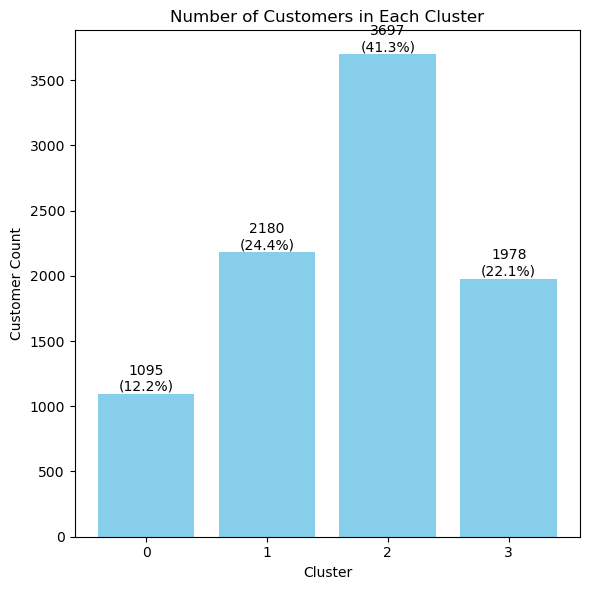

In [187]:
# Count customers in each cluster
cluster_counts = df['CLUSTER'].value_counts().sort_index()
total = cluster_counts.sum()

plt.figure(figsize=(6,6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

# Add count and percentage labels
for bar in bars:
    height = bar.get_height()
    pct = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 1, 
        f'{int(height)}\n({pct:.1f}%)',
        ha='center', va='bottom', fontsize=10
    )

plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

In [188]:
df.groupby(["CLUSTER", "MONETARY_STYLE"]).size().unstack(fill_value=0)

MONETARY_STYLE  Cash-Focused  Mixed-Monetary  Retail-Focused
CLUSTER                                                     
0                        315             684              96
1                        592             149            1439
2                         30             235            3432
3                       1857             117               4

**Analysis**<br>
- Cluster 0 is more mixed monetary with notable cash focused traits.<br>
- There may be more moderate spenders with blended habits<br><br>
- Cluster 1 is more retail focused which signals strong purchase engagement like frequent installments or oneoff buyers.<br><br>
- Cluster 2 is heavily retail focused.<br>
- This can be high value consistent credit users or shoppers.<br><br>
- Cluster 3 is heavily cash focused.<br>
- Which can mean withdrawal heavy users or low engagement shoppers

### CLUSTER 0

**Analysis**<br>
- Cluster 0 is primarily mixed monetary but it also has cash focused users and a small retail presence.<br>
- The mixed monetary majority suggests flexible payment habits where users might switch between retail and cash depending on their contextual needs (balanced customers).<br>
- This can include subscription payers and occasional shoppers.<br><br>
- The cash focused subgroup are likely to be conservative spenders or liquidity driven.<br>
- They are similar to those in cluster 3 but with less intensity.<br>
- These are most likely users who are transitional or inactive risk-averse users.<br><br>
- The low retail users indicates that this cluster doesn't lean into pure shopping as users aren't habitually engaging in structured retail behaviour.'<br>
- In a nutshell, this cluster has low to moderate engagement users with hybrid financial behaviour.<br>
- They are not necessarily loyalty-driven or retail dependent.<br><br>
- Cluster 0 is interesting as it's not retail driven enough to warrant structured merchant offers<br>
- It is also not cash-heavy enough to mirror churn risk.<br>
- Additionally, it is not behaviourally stable enough to build tight personas like the other clusters.<br>
- The user behaviours simply invites light exploration and adaptive engagement where the goal is broad re-engagement nudges to the users that will invite behavioural disclosure overtime.<br><br>

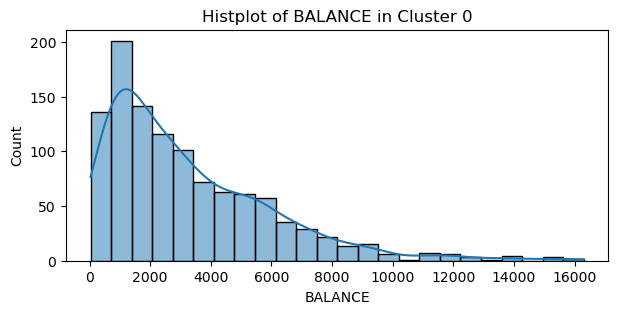

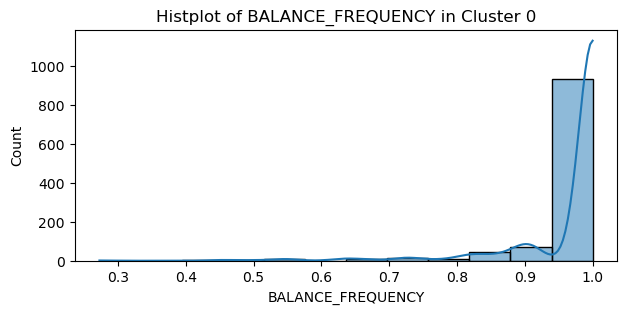

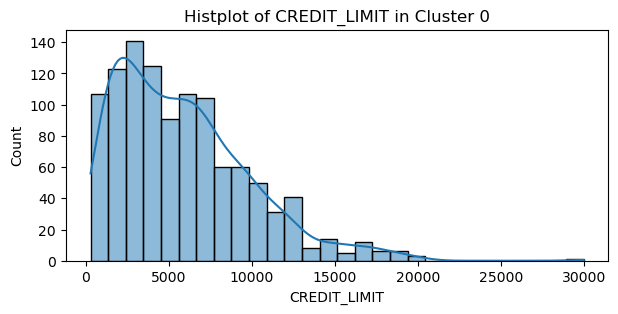

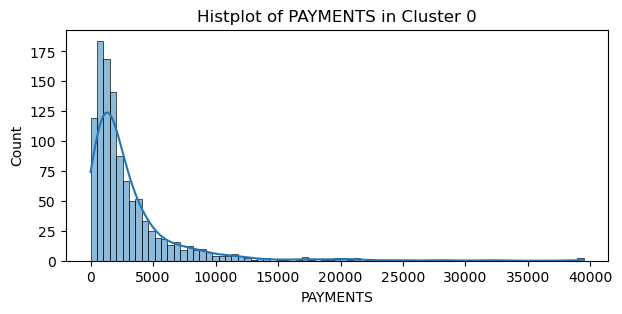

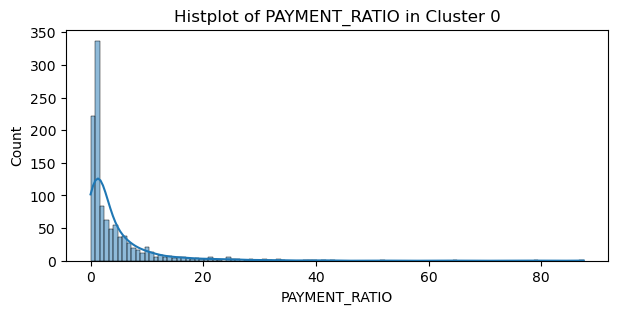

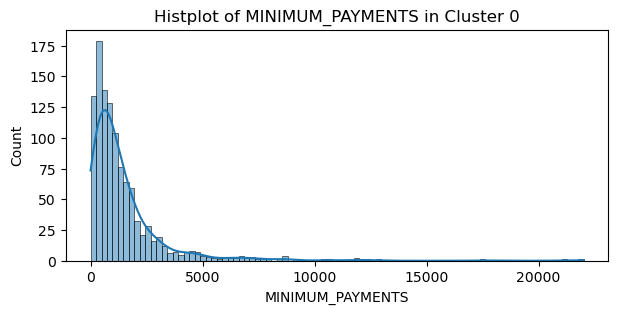

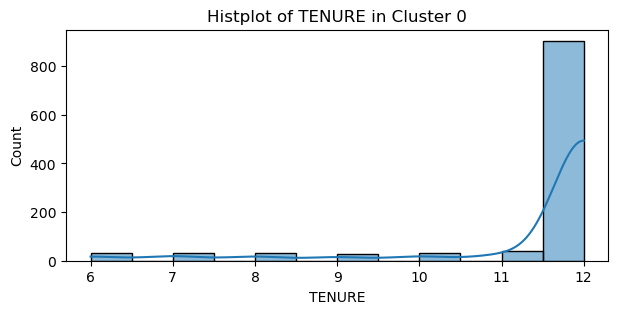

In [189]:
cluster_0_df = df[df["CLUSTER"] == 0].copy()
features = ["BALANCE", "BALANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS", "PAYMENT_RATIO", "MINIMUM_PAYMENTS", "TENURE"]

for col in features:
    plt.figure(figsize=(7,3))
    sns.histplot(data = cluster_0_df, x=col, kde=True)
    plt.title(f"Histplot of {col} in Cluster 0")
    plt.show()

This cluster is similar to cluster 3 behaviour. However, they show differences in their payment behaviour. `PAYMENT_RATIO` and `MINIMUM_PAYMENTS` of cluster 0 is higher and has more distributions than cluster 3 which means that cluster 0 is a less risky group than cluster 3.<br><br>
**Marketing Recommendation for Cluster 0**<br>
- cash perks, loyalty rewards, light engagement promos

### CLUSTER 1

- This cluster is retail dominant but not definitive.<br>
- Even though cluster 1 is retail leaning, it is still behaviourally diverse.<br>
- This means that users may shop regularly but also rely on cash-like behaviours.<br>
- This can imply possible transitional behaviours.<br>
- Some users might be shifting from cash heavy usage to structured spending or vice versa.<br>
- There might also be less consistent repayment or credit patterns compared to cluster 2.<br>
- This might hint at the occasional or seasonal engagement rather than loyalty based spending.

In [190]:
# cluster 1 specific df
cluster_1_df = df[df["CLUSTER"] == 1].copy()

# trait profiling on cluster 1
cluster_1_df[["CREDIT_LIMIT", "BALANCE", "PAYMENTS", "PAYMENT_RATIO", "TENURE"]].describe()

CREDIT_LIMIT       BALANCE      PAYMENTS  PAYMENT_RATIO       TENURE
count   2180.000000   2180.000000   2180.000000    2066.000000  2180.000000
mean    3367.799694    779.709501    760.303690      10.453485    11.566514
std     2965.316274   1131.815857   1528.312014     132.520316     1.235723
min      150.000000      0.000000      0.000000       0.003507     6.000000
25%     1400.000000     21.916416    199.635885       0.852654    12.000000
50%     2500.000000    266.833521    401.422823       1.606900    12.000000
75%     4212.500000   1180.575949    767.595362       4.126452    12.000000
max    23000.000000  12474.729540  29272.486070    4707.141559    12.000000

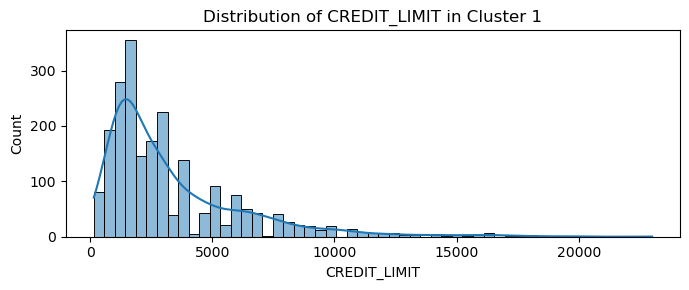

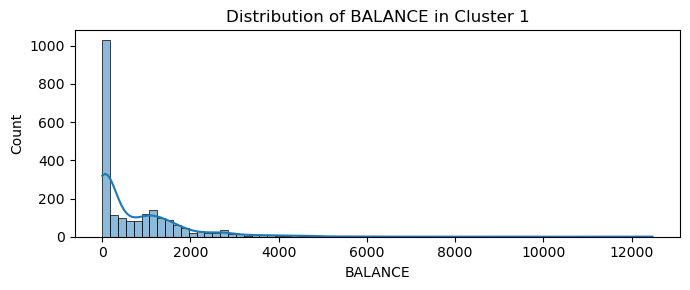

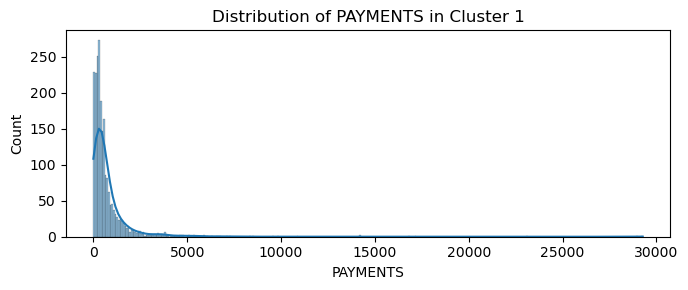

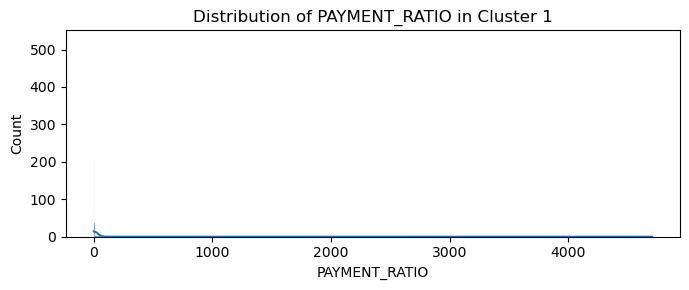

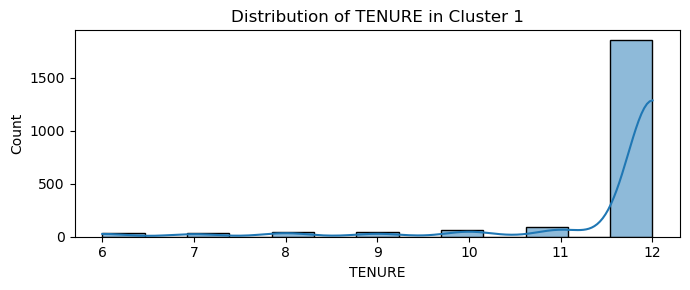

In [191]:
# Boxplots for cluster 1
features = ["CREDIT_LIMIT", "BALANCE", "PAYMENTS", "PAYMENT_RATIO", "TENURE"]

for feature in features:
    plt.figure(figsize=(7, 3))
    sns.histplot(cluster_1_df[feature], kde=True)
    plt.title(f"Distribution of {feature} in Cluster 1")
    plt.tight_layout()
    plt.show()

**Analysis**<br>
- For `CREDIT_LIMIT` users mostly operate within modest limits with a few extreme anomalies.<br>
- For `BALANCE`, there is a low overall which suggests that users don't carry high balances.<br>
- There is extremely wide spread for `PAYMENTS` which means that most users pay little but outliers pay a lot.<br>
- There is a vast variance for `PAYMENT_RATIO` which indicates low repayment discipline in general.<br>
- Most of these customers are long-standing as can be seen from the `TENURE`.<br><br>
- In a nutshell, these are long-tenured users operating with low to mid credit limits, minimal spending, and generally low repayment activity.<br>
- However, the widespread in payments and repayment ratios hints that there is possibly a mix of dormant users, seasonal spenders, and a handful of committed ones.<br><br>
- Cluster 1 is understimulated.<br>

In [192]:
# purchase style
cluster_1_df["PURCHASE_STYLE"].value_counts(normalize=True) * 100

PURCHASE_STYLE
Oneoff Dominant          40.275229
Balanced                 30.733945
Installments Dominant    28.990826
Name: proportion, dtype: float64

In [193]:
pd.crosstab(cluster_1_df["PURCHASE_STYLE"], cluster_1_df["MONETARY_STYLE"], normalize="index")

MONETARY_STYLE         Cash-Focused  Mixed-Monetary  Retail-Focused
PURCHASE_STYLE                                                     
Balanced                   0.802985        0.019403        0.177612
Installments Dominant      0.030063        0.034810        0.935127
Oneoff Dominant            0.039863        0.129841        0.830296

**Analysis and Marketing Recommendations**<br>
Balanced purchase style & cash focused
- makes up around 31% of cluster 1
- but they are strongly cash reliant
- this indicates cautious behaviour: the users prefer liquidity, resist retail or structured credit engagement.
- these users seem to use their credit cards functionally not emotionally
- use cash perks

Installments purchase style & retail focused
- installments purchasers makes up around 29% are habitual installment retail spenders
- they are structurally loyal but less prevalent than in cluster 2
- potential group for merchant targeting

Oneoff dominant & mixed/retail focused
- 40% of cluster 1 falls into fast retail with meaningful mixed monetary.
- this may reflect contextual shoppers with quick purchases across payment channels
- great candidates for seasonal, gamified, or triggered promos

### CLUSTER 2

- Extremely retail-focused group with 93% of the users in the cluster falling into the Retail-Focused group.<br>
- This shows that it's not just a behavioural preference but also core identity of the cluster.<br><br>
Cluster 2 is a purchase-centric group:
- they are more likely to be comfortable with structured borrowing and payback cycles.
- the users represent loyal credit card shoppers or structured spenders

This in theory can be great for marketing that revolves around merchant partnerships, installment programs, or product bundling.

In [194]:
# cluster 2 specific df
cluster_2_df = df[df["CLUSTER"] == 2].copy()

In [195]:
# Purchasing style
cluster_2_df["PURCHASE_STYLE"].value_counts()

PURCHASE_STYLE
Installments Dominant    1625
Balanced                 1200
Oneoff Dominant           872
Name: count, dtype: int64

**Analysis**<br>
- The numbers above shows that although cluster 2 is extremely retail-focused, the split between `PURCHASE_STYLE` is even.<br>
- Even though retail behaviour is a shared theme between the users, the engagement or usage of the credit card varies.<br>
- The installments dominant sub-group likely prefer structured payback, larger purchases, and long-term engagement.<br>
- The balanced sub-group is a group of flexible shoppers that are potentially influenced by context like seasonal needs or promo availabilities.<br>
- The oneoff dominant sub-group is more rapid and high-frequency shoppers and they could be impulsive or routine spenders.<br>
- Due to the fact that the split between purchase styles in cluster 2 is even, further analysis will be per sub-group of purchase style

In [196]:
# Create subgroups
installment_sub = cluster_2_df[cluster_2_df["PURCHASE_STYLE"] == "Installments Dominant"]
oneoff_sub = cluster_2_df[cluster_2_df["PURCHASE_STYLE"] == "Oneoff Dominant"]
balanced_sub = cluster_2_df[cluster_2_df["PURCHASE_STYLE"] == "Balanced"]

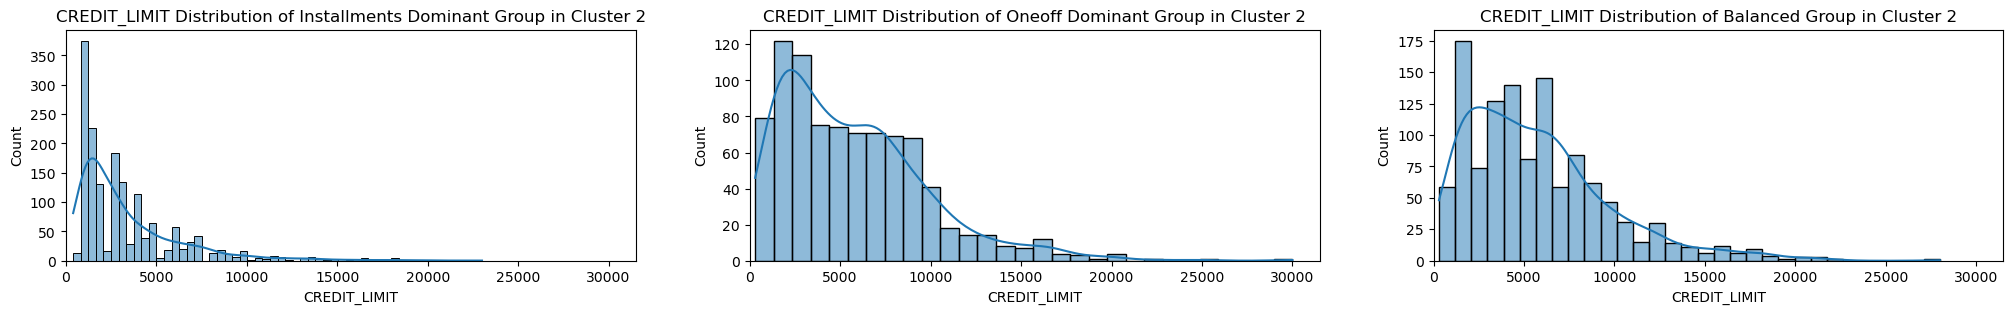

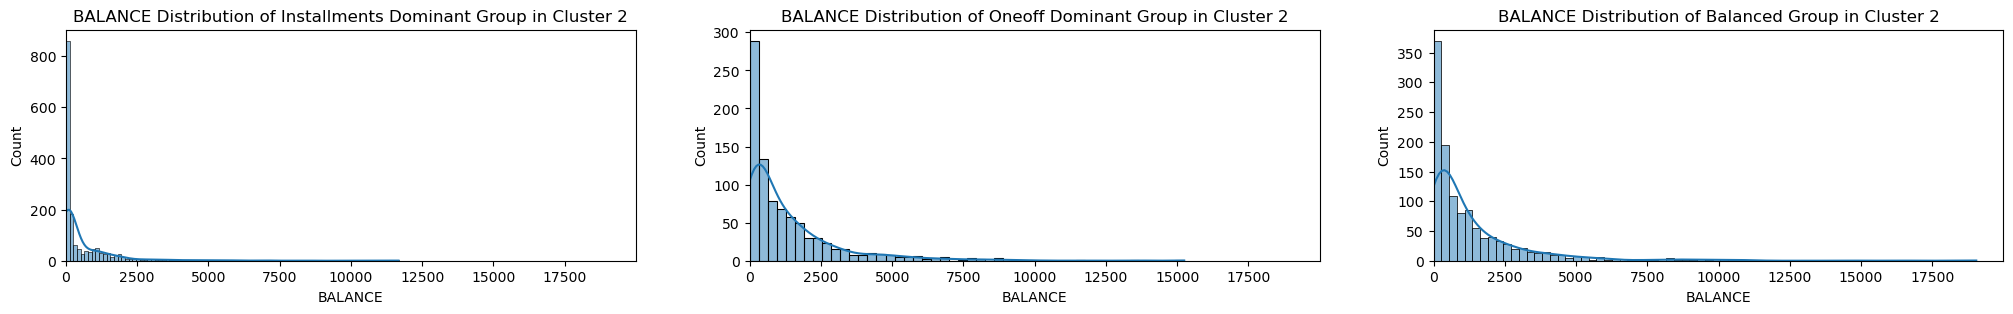

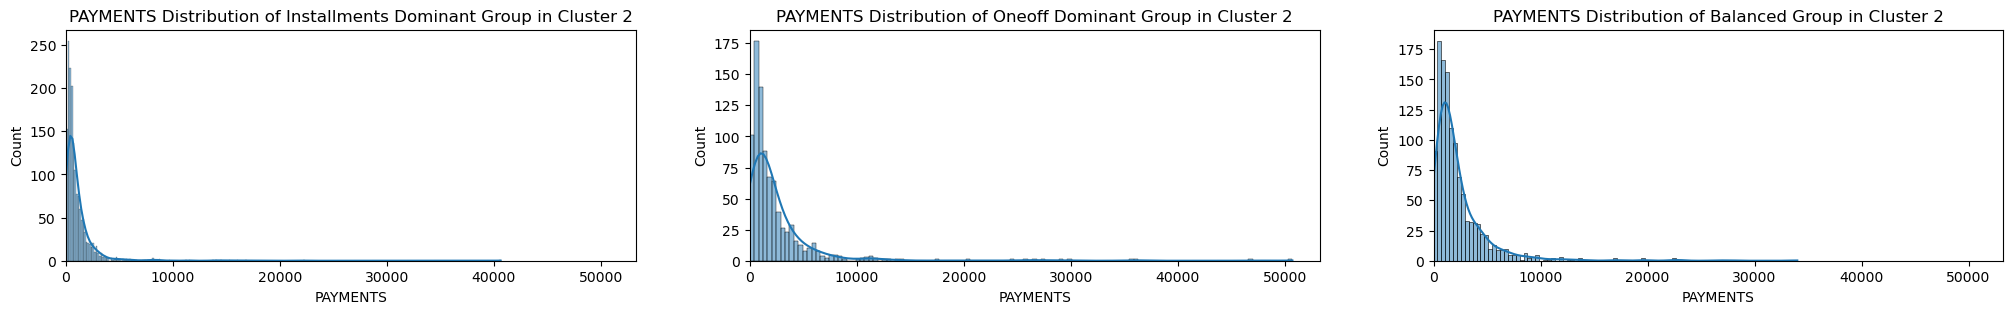

In [197]:
features = ["CREDIT_LIMIT", "BALANCE", "PAYMENTS"]

# Histograms per subgroup
for feature in features:
    plt.figure(figsize=(25, 3))
    
    lower = -0.5
    upper = max(
        installment_sub[feature].max(),
        oneoff_sub[feature].max(),
        balanced_sub[feature].max()
    ) * 1.05  

    plt.subplot(1,3,1)
    sns.histplot(installment_sub[feature], kde=True)
    plt.title(f"{feature} Distribution of Installments Dominant Group in Cluster 2")
    plt.xlim(lower, upper)

    plt.subplot(1,3,2)
    sns.histplot(oneoff_sub[feature], kde=True)
    plt.title(f"{feature} Distribution of Oneoff Dominant Group in Cluster 2")
    plt.xlim(lower, upper)

    plt.subplot(1,3,3)
    sns.histplot(balanced_sub[feature], kde=True)
    plt.title(f"{feature} Distribution of Balanced Group in Cluster 2")
    plt.xlim(lower, upper)
    plt.show()

**Analysis**<br>
1. `CREDIT_LIMIT`
- Installments dominant:
    - right skewed, concentrated in the lower ranges
    - this suggests that most users operate with modest credit ceilings
    - installment use might be more habitual than based on credit strength
- Oneoff dominant:
    - the range is slightly wider than installments but still also right-skewed
    - this indicates low to moderate limits that possibly tied to frequent retail usage without the need to structured repayment
- Balanced:
    - similar range to oneoff dominant but slightly flatter spread
    - this captures the mixed behaviour that there are some conservative users and some flexible
With that, these subgroups are not overwhelmingly high credit users.<br>
As in installments users are not necessarily premium customers, they most likely just prefer structure.

2. `BALANCE`
- they all have similar right skew
- installments users leans slightly lower in balance levels
- oneoff users has higher balances
- balanced group is a little more in the middle

Installments users may be engaging in structured, higher-cost retail purchases using more of their credit.<br>
This can also imply revolving balance from larger purchases or are more persistent spenders.

3. `PAYMENTS`
- Installments dominant:
    - high concentration at the low end but with a noticeable tail stretching into larger payment values.
    - users are not just making small repayments, they are also more likely to engage with structured and periodic payments for higher ticket purchases
    - this suggests stronger financial discipline
- Oneoff dominant:
    - there is tight clustering around low payment values with minimal spread
    - this might reflect small frequent purchases repaid partially or casually
    - possibly less commited users or lower ticket shoppers
- Balanced:
    - distribution is a little bit in the middle of the other two
    - it doesn't show a strong tail toward higher payments like installments but has slightly more variability than oneoff.
    - this supports the idea that balanced users are adaptive and that their repayment behaviour likely shifts with context
<br>

**Marketing Recommendations for Cluster 2**<br>
Installments Dominant:
- structured spenders: proactive payers on higher ticket purchases
- promote merchant bundles and installment incentives
- tiered loyalty offers based on credit engagement

Oneoff Dominant:
- impulse spenders: quick spenders, low repayment discipline
- cashback campaigns and flash discounts

Balanced:
- contextual users: dynamic users reacting to circumstances
- these are test flexible promos like A/B offers

### CLUSTER 3

- Behaviourally distinct from the other 3 clusters.<br>
- Shows a market segment with unique needs.<br><br>
Cluster 3 is cash-centric user group.
- they have low interaction with traditional credit purchases and high preference for liquidity
- they might prioritise control, quick cash access, or avoid long-term financing.

In [198]:
# cluster 3 specific df
cluster_3_df = df[df["CLUSTER"] == 3].copy()

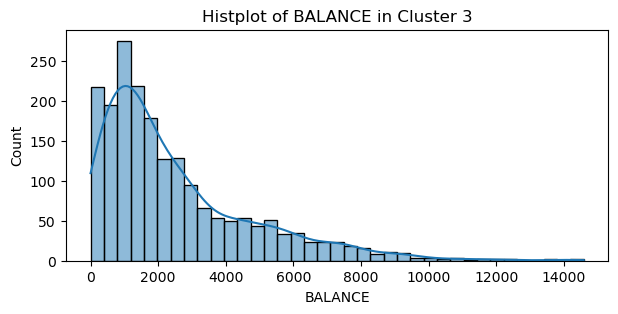

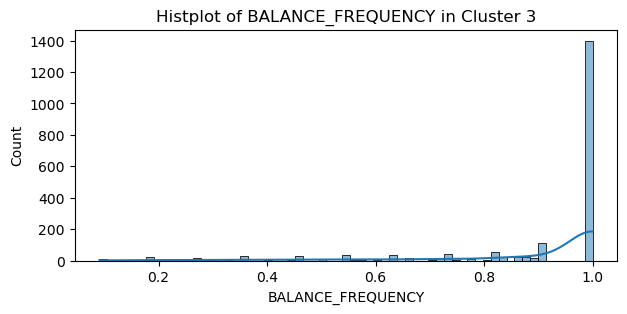

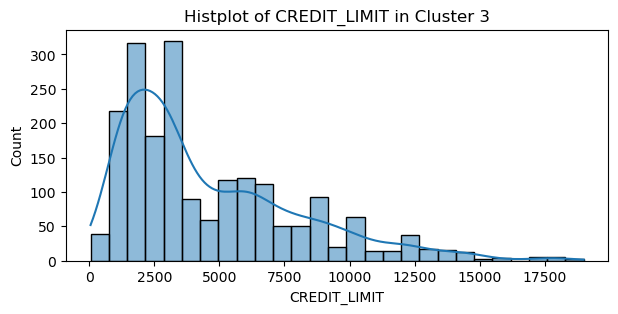

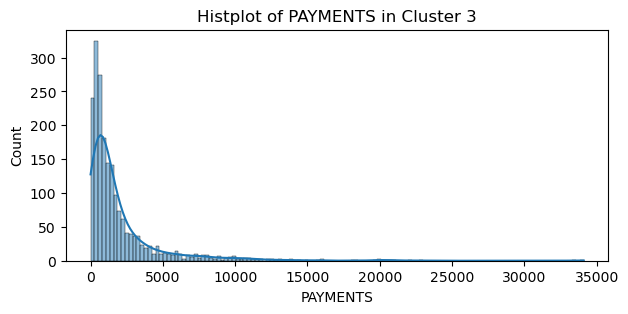

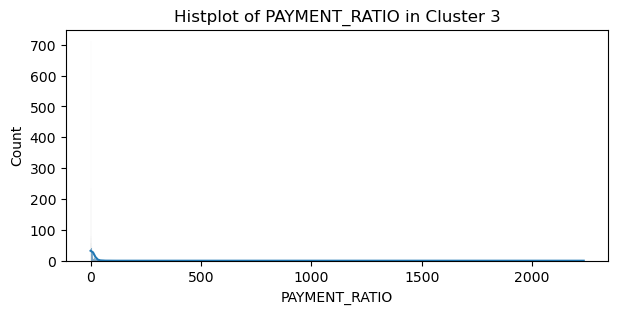

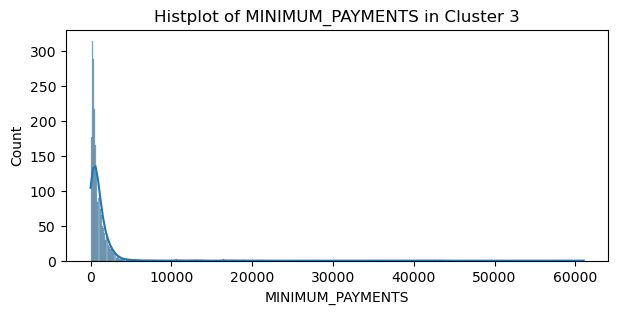

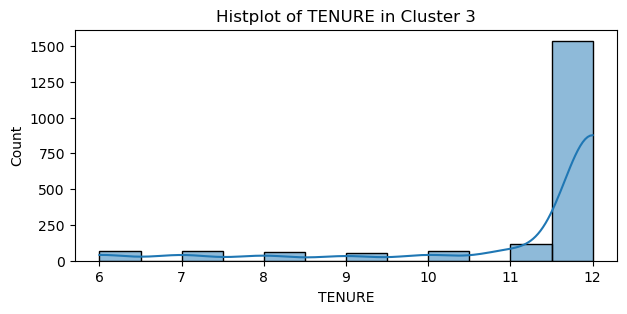

In [199]:
# Features that is interesting to be analysed in cluster 3 for for nuance
features = ["BALANCE", "BALANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS", "PAYMENT_RATIO", "MINIMUM_PAYMENTS", "TENURE"]

for col in features:
    plt.figure(figsize=(7,3))
    sns.histplot(data = cluster_3_df, x=col, kde=True)
    plt.title(f"Histplot of {col} in Cluster 3")
    plt.show()


**Analysis**<br>
- The `BALANCE` in cluster 3 being strong right-skew shows that most users sit below the 4000 mark.<br>
- This indicates high credit utilization where the users are burning through most of their available limit<br>
- For `BALANCE_FREQUENCY`, the values are extremely concentrated near 1.<br>
- Pairing both of them together, it shows persistent usage of credit as immediate cash<br>
- The low `PAYMENTS` and `MINIMUM_PAYMENTS` shows that they are likely minimum repayments or even falling short, reinforcing liquidity dependence.<br>
- This cluster prioritises immediate access to funds.<br><br>
Could be driven by:
- income volatility or cashflow constraints
- limited trust or interest in installment products
- short term financial needs over long term planning.
In a nutshell, cluster 3 is *cash-dependent borrowes with low repayment habits*

In [200]:
# Correlation between BALANCE and CREDIT_LIMIT in cluster 3
corr = cluster_3_df[["BALANCE", "CREDIT_LIMIT"]].corr().iloc[0,1]
print(f"Correlation between BALANCE and CREDIT_LIMIT in Cluster 3: {corr:.3f}")

Correlation between BALANCE and CREDIT_LIMIT in Cluster 3: 0.735


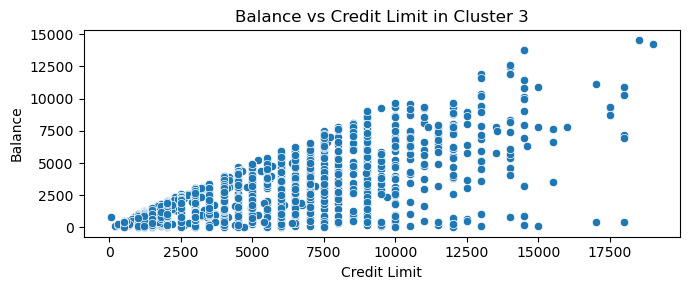

In [201]:
# Scatterplot of correlation
plt.figure(figsize=(7, 3))
sns.scatterplot(data=cluster_3_df, x="CREDIT_LIMIT", y="BALANCE")
plt.title("Balance vs Credit Limit in Cluster 3")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.tight_layout()
plt.show()

In [202]:
balance_stat, balance_p = shapiro(cluster_3_df["BALANCE"])
limit_stat, limit_p = shapiro(cluster_3_df["CREDIT_LIMIT"])

print(f"BALANCE p-value: {balance_p:.5f}")
print(f"CREDIT_LIMIT p-value: {limit_p:.5f}")

BALANCE p-value: 0.00000
CREDIT_LIMIT p-value: 0.00000


**Analysis**<br>
- There is a strong positive correlation between `BALANCE` and `CREDIT_LIMIT` in Cluster 3.<br>
- With a correlation coefficient of 0.735.<br>
- This means that users with lower credit limits also tend to have lower balances.<br>
- There is consistent high utilization where the users frequently near their credit ceiling.<br>
- There is low credit limit while being cash reliant customer who takes as much value from their low credit limits as possible <br><br>
- This cluster with credit strain and liquidity dependence is a potential risk for churn if not supported well.<br>
- Lower `BALANCE` and lower `CREDIT_LIMIT` means these users use up their credit for cash until it hits their credit limits.<br>
- The extreme cases are risky users<br><br>
- Pvalue for `BALANCE` is < 0.05<br>
- Pvalue for `CREDIT_LIMIT` is < 0.05<br>
- Which means that both distribution is not normally distributed and therefore are not well described by the mean and standard deviation.<br>
- Using quantiles and median offers a more robust distribution

In [203]:
# Risk flagging behaviour in cluster 3
credit_p25 = cluster_3_df["CREDIT_LIMIT"].quantile(0.25)
balance_p25 = cluster_3_df["BALANCE"].quantile(0.25)

cluster_3_df["RISK_TIER"] = np.where(
    (cluster_3_df["CREDIT_LIMIT"] <= credit_p25) & (cluster_3_df["BALANCE"] <= balance_p25),
    "High Risk",
    "Moderate/Low Risk"
)

In [204]:
cluster_3_df["RISK_TIER"].value_counts()

RISK_TIER
Moderate/Low Risk    1688
High Risk             290
Name: count, dtype: int64

**Marketing Recommendations for Cluster 3**<br>
High risk:
- lower credit limit, low balance, and minimal payments
- fee relief, budgeting nudges, and repayment incentives

Low & Moderate risk:
- higher limits or better repayments, but still cash reliant
- cash perks, loyalty rewards, light engagement promos

## 6. Conclusion

This goal is about clustering the data of credit card customers for a financial institution to create distinct behavioural group.
- In this specific project, the RFM model concept was adapted to select the features that were fed into the final clustering algorithm.
- Additionally, dimensionality reduction technique PCA is also used to comprehend the clusters and what they represent.<br>

The initial exploratory data analysis shows that there are a few features with high correlation with each other.
- These correlations assists in understanding further what the features actually indicate regarding the user behaviour.
- After comprehending the features further, one of the biggest findings is that most of the users have low BALANCE but high BALANCE_FREQUENCY.
- This means that there is heavy utilisation at high credit limits.
- Additionally, there seemed to be an interesting spread in regards to the users' behaviour on their credit card usage purpose.
- It is notable however, that this dataset does not have users' recency feature which would enrich the data analysis while using the RFM model.
- With that, the clustering was conducted by feeding it the frequency and monetary.<br>
- The final clustering model used in this project is the K-Means with a total of 4 clusters and the final silhouette score of 0.3925 which is not the strongest score but it is not weak either.
- Although the silhouette score is below 0.5, the PCA projection shows clear separation between the clusters in reduced dimensionality which supports the claim that the clusters are interpretable and not random.<br>

Cluster 0 or the **Low Touch Explorers** is one of the main clusters in this dataset.<br>
- They are interesting as they don't technically have fixed behaviours or tight personas unlike the other clusters.<br>
- This group is not retail driven enough to warrant merchant offers nor are they cash-heavy enough to mirror churn risk.<br>
- With that, this behaviour is most similar to cluster's 3 low and moderate risk group.<br><br>

Cluster 1 or the **Transitional Group** is the next cluster in this dataset.<br>
- This cluster is retail dominant but is not the definitive behaviour of the users as it is still diverse as there are also cash-reliant behaviours.<br>
- Thus implies possible transitional behaviours.<br>
- The main take here is that cluster 1 is under stimulated and after further exploration into this cluster, there is 3 sub-groups that should be treated differently for the marketing segmentation:
    - Balanced purchase style and cash focused
    - Instalments purchase style and retail focused
    - Oneoff purchase style and mixed/retail focused

Cluster 2 is the **Active Retailers** where they are extremely retail-focused.<br>
- This cluster has the clearest behavioural archetype of deeply retail-driven where they are ready to be primed for high engagement campaigns.<br>
- Even so, there is an even split of PURCHASE_STYLE in this group.<br>
- With that, these sub-groups has to be treated different in regards to their segmentations.
    - Installments Dominant
    - Oneoff Dominant
    - Balanced

Cluster 3 is the most distinct cluster where it's not just cash focused but also conservative, low engagement and structurally disengaged.<br>
- **The Liquidity Holdouts** group has high cash reliance and minimal engagement across the financial products.<br>
- Although, after looking further into the BALANCE and CREDIT_LIMIT, cluster 3 can be divided again into 2 sub-groups where the marketing recommendations differ across the sub-groups.:
    - High risk
    - Low/Moderate risk

All in all, effective marketing strategies all depends on the clusters and the sub-cluster uncovered through EDA, clustering, and post-clustering EDA.

## 7. Actionable Recommendations

#### Cluster 0 - Low Touch Explorers
Actionable recommendations:
- In store cashback campaign: offer 5% cashback on cash purchases over USD 50 during weekends
- Loyalty rewards: launch a "welcome back" stamp card to intice repeat behaviour
- Light engagement push: send monthly SMS notifications with opt-in mini promos (e.g. 1 click activation)

#### Cluster 1 - Transitional Group
Balanced purchase style & cash focused.<br>
Actionable recommendations:
- Cash incentive promos: "pay with cash, earn savings". This can be a tiered discount absed on the bill amount.
- Location based promos: promote localised cash-friendly merchant deals through push notifications.

Installments purchase style & retail focused
Actionable recommendations:
- Merchant partnerships: target with personalised merchant bundles like electronics or fashion, linked to installment offers
- Progressive credit rewards: reward full repayment behaviour with additional discounts or loyalty points

Oneoff dominant & mixed/retail focused
Actionable recommendations:
- Seasonal hooks: flash discounts before holidays or payday cyles with a "spend and spin" mechanics.

#### Cluster 2 - Active Retailers
Installments Dominant:
Actionable recommendations:
- Merchant bundles: bundle brands in specific categories like home appliances, with low-interest installment options
- Tiered loyalty: create and put users in tiers based on monthly credit engagement with exclusive offers

Oneoff Dominant:
Actionable recommendations:
- Cashback campaigns: send targeted limited time cashback offers tied to spend threshold of over USD 250
- Flash promos: app-only discounts during defined "happy hour" windows to drive urgency

Balanced:
Actionable recommendations:
- Dynamic promo testing: do A/B experiments on different promo formats: coupon vs points vs bundles

#### Cluster 3 - The Liquidity Holdouts
High risk
Actionable recommendations:
- Fee relief messaging: send SMS with empathetic "we are here to help you" tone and fee waivers
- Budgeting toolkit access: give users link to financial health resources
- Repayment incentives: offer small cashback for completeing minimum payments over 3 cycles

Low & Moderate risk:
Actionable recommendations:
- Cash perk reinforcement: offer users USD 10 cash reward for 3 consecutive cash transactions
- Soft engagement nudges: promote loyalty programs with personalised callouts
- Trusted merchant campaigns: prioritise promos with high-cash acceptance merchants for comfort and trust.

## 8. PIPELINE

In [205]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from custom_transformers import CustomImputer, FixPurchases, TotalMonetaryAdder

selected_features = [
    "PURCHASES_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "PURCHASES_TRX",
    "CASH_ADVANCE_TRX",
    "TOTAL_SPENDING"]

clustering_preprocessor = ColumnTransformer([
    ('log1p', FunctionTransformer(np.log1p, validate=False), selected_features),], remainder='drop')

full_pipeline = Pipeline(steps=[
    ('impute_and_fix', CustomImputer()),
    ('fix_purchase', FixPurchases()),
    ('monetary', TotalMonetaryAdder()),
    ('log_and_scale', Pipeline(steps=[
        ('select_and_log', clustering_preprocessor),
        ('scaler', StandardScaler())])),
    ("kmeans", KMeans(n_clusters=4, random_state=42))])

In [206]:
full_pipeline.fit(df)

Pipeline(steps=[('impute_and_fix', CustomImputer()),
                ('fix_purchase', FixPurchases()),
                ('monetary', TotalMonetaryAdder()),
                ('log_and_scale',
                 Pipeline(steps=[('select_and_log',
                                  ColumnTransformer(transformers=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>),
                                                                   ['PURCHASES_FREQUENCY',
                                                                    'CASH_ADVANCE_FREQUENCY',
                                                                    'PURCHASES_TRX',
                                                                    'CASH_ADVANCE_TRX',
                                                                    'TOTAL_SPENDING'])])),
                                 ('scaler', StandardScaler())])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

## 9. PICKLE EXPORT

In [207]:
import pickle
with open("clustering_pipeline.sav", "wb") as f:
    pickle.dump(full_pipeline, f)